<a href="https://colab.research.google.com/github/MauricioRPF/Weather_Report/blob/main/Weather_Report_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para ler arquivo Excel
!pip install openpyxl
import openpyxl

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Estatística
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configurações de visualização
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [2]:
# URL do arquivo Excel no GitHub (formato raw)
github_url = "https://github.com/MauricioRPF/Weather_Report/raw/refs/heads/main/Dados%20meteorol%C3%B3gicos%20di%C3%A1rios%20-%20esta%C3%A7%C3%A3o%20Embrapa%20Agrossilvipastoril.xlsx"

# Carregar o arquivo Excel
# skiprows=3 para pular as 3 primeiras linhas e começar na linha 4 (cabeçalho)
confere = pd.read_excel(github_url, skiprows=3, engine='openpyxl')

print("Dimensões do DataFrame:", confere.shape)
print("\nPrimeiras 5 linhas:")
confere.head()

Dimensões do DataFrame: (4464, 20)

Primeiras 5 linhas:


,Ano,Mês,Dia,° C,Unnamed: 4,hh:mm:ss,° C.1,hh:mm:ss.1,%,Unnamed: 9,hh:mm:ss.2,%.1,hh:mm:ss.3,m s-1,hh:mm:ss.4,mm,MJ m-2 d-1,Unnamed: 17,m s-1.1,Graus
0,NaN,NaN,NaN,Temperatura média do ar,Temperatura máxima do ar,Horário da temperatura máxima do ar,Temperatura mínima do ar,Horário da temperatura mínima do ar,Umidade relativa média do ar,Umidade relativa máxima do ar,Horário da umidade relativa máxima do ar,Umidade relativa mínima do ar,Horário da umidade relativa mínima do ar,Velocidade máxima do vento,Horário da velocidade máxima do vento,Precipitação acumulada,Radiação solar global,Radiação fotossinteticamente ativa,Velocidade média do vento,Direção predominante do vento
1,2013.0,Agosto,13.0,26.6,36.06,2013-08-13 15:15:55,17.44,2013-08-13 06:03:05,54.09,87.4,2013-08-13 05:50:55,25.69,2013-08-13 15:26:05,10.08,2013-08-13 12:27:00,0,18.61,6.811,1.407,359.5
2,2013.0,Agosto,14.0,23.67,30.52,2013-08-14 12:10:20,17.42,2013-08-14 23:59:15,55.49,79.63,2013-08-14 00:33:10,36.04,2013-08-14 14:51:55,11.1,2013-08-14 12:23:55,0,20.81,7.517,4.168,194.6
3,2013.0,Agosto,15.0,20.67,29.86,2013-08-15 15:04:20,13.12,2013-08-15 06:00:25,46.33,68.05,2013-08-15 05:29:35,26.1,2013-08-15 12:27:55,9.26,2013-08-15 09:14:40,0,19.26,6.96,2.57,179.2
4,2013.0,Agosto,16.0,23.44,35.76,2013-08-16 15:34:55,12.22,2013-08-16 05:29:50,46.13,85.3,2013-08-16 05:29:05,20.25,2013-08-16 15:35:05,6.37,2013-08-16 09:55:25,0,22.12,7.971,1.803,123.7


In [3]:
# URL do arquivo Excel no GitHub (formato raw)
github_url = "https://github.com/MauricioRPF/Weather_Report/raw/refs/heads/main/Dados%20meteorol%C3%B3gicos%20di%C3%A1rios%20-%20esta%C3%A7%C3%A3o%20Embrapa%20Agrossilvipastoril.xlsx"

# Carregar o arquivo Excel
# skiprows=3 para pular as 3 primeiras linhas e começar na linha 4 (cabeçalho)
df = pd.read_excel(github_url, skiprows=4, engine='openpyxl')

novos_nomes = list(df.columns)
novos_nomes[0] = 'Ano'
novos_nomes[1] = 'Mês'
novos_nomes[2] = 'Dia'
df.columns = novos_nomes

# Verificar se carregou corretamente
print("Dimensões do DataFrame:", df.shape)
print("\nPrimeiras 5 linhas:")
df.head()

Dimensões do DataFrame: (4463, 20)

Primeiras 5 linhas:


,Ano,Mês,Dia,Temperatura média do ar,Temperatura máxima do ar,Horário da temperatura máxima do ar,Temperatura mínima do ar,Horário da temperatura mínima do ar,Umidade relativa média do ar,Umidade relativa máxima do ar,Horário da umidade relativa máxima do ar,Umidade relativa mínima do ar,Horário da umidade relativa mínima do ar,Velocidade máxima do vento,Horário da velocidade máxima do vento,Precipitação acumulada,Radiação solar global,Radiação fotossinteticamente ativa,Velocidade média do vento,Direção predominante do vento
0,2013,Agosto,13,26.60,36.06,2013-08-13 15:15:55,17.44,2013-08-13 06:03:05,54.09,87.40,2013-08-13 05:50:55,25.69,2013-08-13 15:26:05,10.08,2013-08-13 12:27:00,0.0,18.61,6.811,1.407,359.5
1,2013,Agosto,14,23.67,30.52,2013-08-14 12:10:20,17.42,2013-08-14 23:59:15,55.49,79.63,2013-08-14 00:33:10,36.04,2013-08-14 14:51:55,11.10,2013-08-14 12:23:55,0.0,20.81,7.517,4.168,194.6
2,2013,Agosto,15,20.67,29.86,2013-08-15 15:04:20,13.12,2013-08-15 06:00:25,46.33,68.05,2013-08-15 05:29:35,26.10,2013-08-15 12:27:55,9.26,2013-08-15 09:14:40,0.0,19.26,6.960,2.570,179.2
3,2013,Agosto,16,23.44,35.76,2013-08-16 15:34:55,12.22,2013-08-16 05:29:50,46.13,85.30,2013-08-16 05:29:05,20.25,2013-08-16 15:35:05,6.37,2013-08-16 09:55:25,0.0,22.12,7.971,1.803,123.7
4,2013,Agosto,17,25.89,36.33,2013-08-17 12:51:35,17.84,2013-08-17 06:04:15,47.76,72.86,2013-08-17 06:17:25,21.23,2013-08-17 12:51:50,8.00,2013-08-17 11:58:55,0.0,19.50,7.067,2.024,126.9


In [4]:
# Informações básicas do DataFrame
print("=== INFORMAÇÕES DO DATAFRAME ===")
df.info()

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
df.describe()

print("\n=== NOMES DAS COLUNAS ===")
print(df.columns.tolist())

print("\n=== VERIFICANDO VALORES NULOS ===")
print(df.isnull().sum())

=== INFORMAÇÕES DO DATAFRAME ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Ano                                       4463 non-null   int64  
 1   Mês                                       4463 non-null   object 
 2   Dia                                       4463 non-null   int64  
 3   Temperatura média do ar                   4451 non-null   float64
 4   Temperatura máxima do ar                  4451 non-null   float64
 5   Horário da temperatura máxima do ar       4451 non-null   object 
 6   Temperatura mínima do ar                  4451 non-null   float64
 7   Horário da temperatura mínima do ar       4451 non-null   object 
 8   Umidade relativa média do ar              4451 non-null   float64
 9   Umidade relativa máxima do ar             4451 non-null   float64
 10  Hor

In [5]:
print("=== CONVERSÃO DO MÊS DE TEXTO PARA NÚMERO ===")

# Verificar os valores únicos na coluna Mês
print("Valores únicos na coluna 'Mês':")
print(df['Mês'].unique())

# Dicionário de mapeamento português-inglês para números
mes_para_numero = {
    'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4,
    'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8,
    'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
}

# Converter mês texto para número
df['Mês_num'] = df['Mês'].map(mes_para_numero)

# Verificar a conversão
print("\nConversão realizada:")
print(df[['Mês', 'Mês_num']].head(10))

# Verificar se alguma linha não foi convertida (valores NaN)
na_count = df['Mês_num'].isna().sum()
print(f"\nLinhas não convertidas: {na_count}")
if na_count > 0:
    print("Meses não mapeados:")
    print(df[df['Mês_num'].isna()]['Mês'].unique())

=== CONVERSÃO DO MÊS DE TEXTO PARA NÚMERO ===
Valores únicos na coluna 'Mês':
['Agosto' 'Setembro' 'Outubro' 'Novembro' 'Dezembro' 'Janeiro' 'Fevereiro'
 'Março' 'Abril' 'Maio' 'Junho' 'Julho']

Conversão realizada:
      Mês  Mês_num
0  Agosto        8
1  Agosto        8
2  Agosto        8
3  Agosto        8
4  Agosto        8
5  Agosto        8
6  Agosto        8
7  Agosto        8
8  Agosto        8
9  Agosto        8

Linhas não convertidas: 0


In [6]:
print("=== ABORDAGEM DIRETA - USANDO OS ÍNDICES DAS COLUNAS ===")

# Assumindo que:
# Coluna 0 = Ano, Coluna 1 = Mês (texto), Coluna 2 = Dia
print(f"Ano (coluna 0): {df.columns[0]}")
print(f"Mês (coluna 1): {df.columns[1]}")
print(f"Dia (coluna 2): {df.columns[2]}")

# Criar data usando os índices das colunas
df['Data'] = pd.to_datetime({
    'year': df.iloc[:, 0],  # Ano (primeira coluna)
    'month': df['Mês_num'], # Mês numérico que criamos
    'day': df.iloc[:, 2]    # Dia (terceira coluna)
})

print(f"\nData criada com sucesso usando índices!")
print(df[['Data']].head())

=== ABORDAGEM DIRETA - USANDO OS ÍNDICES DAS COLUNAS ===
Ano (coluna 0): Ano
Mês (coluna 1): Mês
Dia (coluna 2): Dia

Data criada com sucesso usando índices!
        Data
0 2013-08-13
1 2013-08-14
2 2013-08-15
3 2013-08-16
4 2013-08-17


In [7]:
print("=== REORGANIZANDO O DATAFRAME ===")

print("Shape antes da reorganização:", df.shape)
print("Colunas antes:", df.columns.tolist())

# Salvar a coluna Data temporariamente
data_col = df['Data'].copy()

# Remover as 3 primeiras colunas (Ano, Mês, Dia) e a coluna Data atual
# Vamos remover pelo índice das colunas
df_clean = df.drop(df.columns[[0, 1, 2]], axis=1)  # Remove as 3 primeiras colunas
df_clean = df_clean.drop('Data', axis=1)  # Remove a coluna Data atual (que está no final)

# Adicionar a coluna Data na primeira posição
df_clean.insert(0, 'Data', data_col)

print("\nShape após reorganização:", df_clean.shape)
print("Colunas após:", df_clean.columns.tolist())

print("\nPrimeiras 5 linhas do DataFrame reorganizado:")
df_clean.head()

=== REORGANIZANDO O DATAFRAME ===
Shape antes da reorganização: (4463, 22)
Colunas antes: ['Ano', 'Mês', 'Dia', 'Temperatura média do ar', 'Temperatura máxima do ar', 'Horário da temperatura máxima do ar', 'Temperatura mínima do ar', 'Horário da temperatura mínima do ar', 'Umidade relativa média do ar', 'Umidade relativa máxima do ar', 'Horário da umidade relativa máxima do ar', 'Umidade relativa mínima do ar', 'Horário da umidade relativa mínima do ar', 'Velocidade máxima do vento', 'Horário da velocidade máxima do vento', 'Precipitação acumulada', 'Radiação solar global', 'Radiação fotossinteticamente ativa', 'Velocidade média do vento', 'Direção predominante do vento', 'Mês_num', 'Data']

Shape após reorganização: (4463, 19)
Colunas após: ['Data', 'Temperatura média do ar', 'Temperatura máxima do ar', 'Horário da temperatura máxima do ar', 'Temperatura mínima do ar', 'Horário da temperatura mínima do ar', 'Umidade relativa média do ar', 'Umidade relativa máxima do ar', 'Horário da u

,Data,Temperatura média do ar,Temperatura máxima do ar,Horário da temperatura máxima do ar,Temperatura mínima do ar,Horário da temperatura mínima do ar,Umidade relativa média do ar,Umidade relativa máxima do ar,Horário da umidade relativa máxima do ar,Umidade relativa mínima do ar,Horário da umidade relativa mínima do ar,Velocidade máxima do vento,Horário da velocidade máxima do vento,Precipitação acumulada,Radiação solar global,Radiação fotossinteticamente ativa,Velocidade média do vento,Direção predominante do vento,Mês_num
0,2013-08-13,26.60,36.06,2013-08-13 15:15:55,17.44,2013-08-13 06:03:05,54.09,87.40,2013-08-13 05:50:55,25.69,2013-08-13 15:26:05,10.08,2013-08-13 12:27:00,0.0,18.61,6.811,1.407,359.5,8
1,2013-08-14,23.67,30.52,2013-08-14 12:10:20,17.42,2013-08-14 23:59:15,55.49,79.63,2013-08-14 00:33:10,36.04,2013-08-14 14:51:55,11.10,2013-08-14 12:23:55,0.0,20.81,7.517,4.168,194.6,8
2,2013-08-15,20.67,29.86,2013-08-15 15:04:20,13.12,2013-08-15 06:00:25,46.33,68.05,2013-08-15 05:29:35,26.10,2013-08-15 12:27:55,9.26,2013-08-15 09:14:40,0.0,19.26,6.960,2.570,179.2,8
3,2013-08-16,23.44,35.76,2013-08-16 15:34:55,12.22,2013-08-16 05:29:50,46.13,85.30,2013-08-16 05:29:05,20.25,2013-08-16 15:35:05,6.37,2013-08-16 09:55:25,0.0,22.12,7.971,1.803,123.7,8
4,2013-08-17,25.89,36.33,2013-08-17 12:51:35,17.84,2013-08-17 06:04:15,47.76,72.86,2013-08-17 06:17:25,21.23,2013-08-17 12:51:50,8.00,2013-08-17 11:58:55,0.0,19.50,7.067,2.024,126.9,8


In [8]:
print("=== VERIFICAÇÃO FINAL ===")
print(f"Shape: {df_clean.shape}")
print(f"\nPrimeira coluna: '{df_clean.columns[0]}'")
print(f"Tipo da coluna Data: {df_clean['Data'].dtype}")
print(f"\nPeríodo coberto: {df_clean['Data'].min()} até {df_clean['Data'].max()}")
print(f"Total de registros: {len(df_clean)}")

print("\nEstrutura completa:")
df_clean.info()

=== VERIFICAÇÃO FINAL ===
Shape: (4463, 19)

Primeira coluna: 'Data'
Tipo da coluna Data: datetime64[ns]

Período coberto: 2013-08-13 00:00:00 até 2025-10-31 00:00:00
Total de registros: 4463

Estrutura completa:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data                                      4463 non-null   datetime64[ns]
 1   Temperatura média do ar                   4451 non-null   float64       
 2   Temperatura máxima do ar                  4451 non-null   float64       
 3   Horário da temperatura máxima do ar       4451 non-null   object        
 4   Temperatura mínima do ar                  4451 non-null   float64       
 5   Horário da temperatura mínima do ar       4451 non-null   object        
 6   Umidade relativa média do ar              4451 non-

In [9]:
# Atualizar o DataFrame principal
df = df_clean.copy()

print("DataFrame final preparado!")
print(f"Colunas: {df.columns.tolist()}")
print(f"Primeira coluna: {df.columns[0]}")

DataFrame final preparado!
Colunas: ['Data', 'Temperatura média do ar', 'Temperatura máxima do ar', 'Horário da temperatura máxima do ar', 'Temperatura mínima do ar', 'Horário da temperatura mínima do ar', 'Umidade relativa média do ar', 'Umidade relativa máxima do ar', 'Horário da umidade relativa máxima do ar', 'Umidade relativa mínima do ar', 'Horário da umidade relativa mínima do ar', 'Velocidade máxima do vento', 'Horário da velocidade máxima do vento', 'Precipitação acumulada', 'Radiação solar global', 'Radiação fotossinteticamente ativa', 'Velocidade média do vento', 'Direção predominante do vento', 'Mês_num']
Primeira coluna: Data


In [10]:
print("=== ANÁLISE DE VALORES MISSING ===")
missing_analysis = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_analysis,
    'Missing_Percent': missing_percent
})
print(missing_df[missing_df['Missing_Count'] > 0])

=== ANÁLISE DE VALORES MISSING ===
                                          Missing_Count  Missing_Percent
Temperatura média do ar                              12         0.268877
Temperatura máxima do ar                             12         0.268877
Horário da temperatura máxima do ar                  12         0.268877
Temperatura mínima do ar                             12         0.268877
Horário da temperatura mínima do ar                  12         0.268877
Umidade relativa média do ar                         12         0.268877
Umidade relativa máxima do ar                        12         0.268877
Horário da umidade relativa máxima do ar             12         0.268877
Umidade relativa mínima do ar                        12         0.268877
Horário da umidade relativa mínima do ar             12         0.268877
Velocidade máxima do vento                           12         0.268877
Horário da velocidade máxima do vento                12         0.268877
Precipitação acu

In [11]:
print("=== DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS ===")

# Selecionar apenas colunas numéricas (excluir Ano, Mês, Dia inicialmente)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Variáveis numéricas:", numeric_cols)

# Estatísticas descritivas detalhadas
print("\nEstatísticas descritivas:")
df[numeric_cols].describe()

=== DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS ===
Variáveis numéricas: ['Temperatura média do ar', 'Temperatura máxima do ar', 'Temperatura mínima do ar', 'Umidade relativa média do ar', 'Umidade relativa máxima do ar', 'Umidade relativa mínima do ar', 'Velocidade máxima do vento', 'Precipitação acumulada', 'Radiação solar global', 'Radiação fotossinteticamente ativa', 'Velocidade média do vento', 'Direção predominante do vento', 'Mês_num']

Estatísticas descritivas:


,Temperatura média do ar,Temperatura máxima do ar,Temperatura mínima do ar,Umidade relativa média do ar,Umidade relativa máxima do ar,Umidade relativa mínima do ar,Velocidade máxima do vento,Precipitação acumulada,Radiação solar global,Radiação fotossinteticamente ativa,Velocidade média do vento,Direção predominante do vento,Mês_num
count,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4451.000000,4463.000000
mean,25.703103,33.146461,20.033855,73.506188,93.501069,44.600239,8.011461,6.200165,19.050585,6.901168,1.612503,131.021410,6.570020
std,1.676831,2.843641,2.588636,15.655526,7.736382,16.481426,2.149048,15.568565,4.091317,1.554534,0.423144,126.688773,3.437339
min,15.550000,22.900000,8.290000,28.150000,51.080000,10.000000,2.340000,0.000000,2.099000,0.858000,0.300000,0.000000,1.000000
25%,24.720000,31.580000,18.600000,61.860000,91.200000,30.910000,6.550000,0.000000,17.205000,6.142500,1.332000,45.675000,4.000000
50%,25.620000,33.110000,20.970000,77.890000,95.900000,45.620000,7.800000,0.000000,19.790000,7.057000,1.562000,90.900000,7.000000
75%,26.670000,34.815000,21.900000,85.900000,99.750000,56.470000,9.000000,3.810000,21.685000,7.896500,1.834000,192.400000,10.000000
max,31.260000,40.870000,24.670000,100.000000,100.000000,98.600000,20.870000,174.200000,28.820000,11.980000,4.349000,4071.000000,12.000000


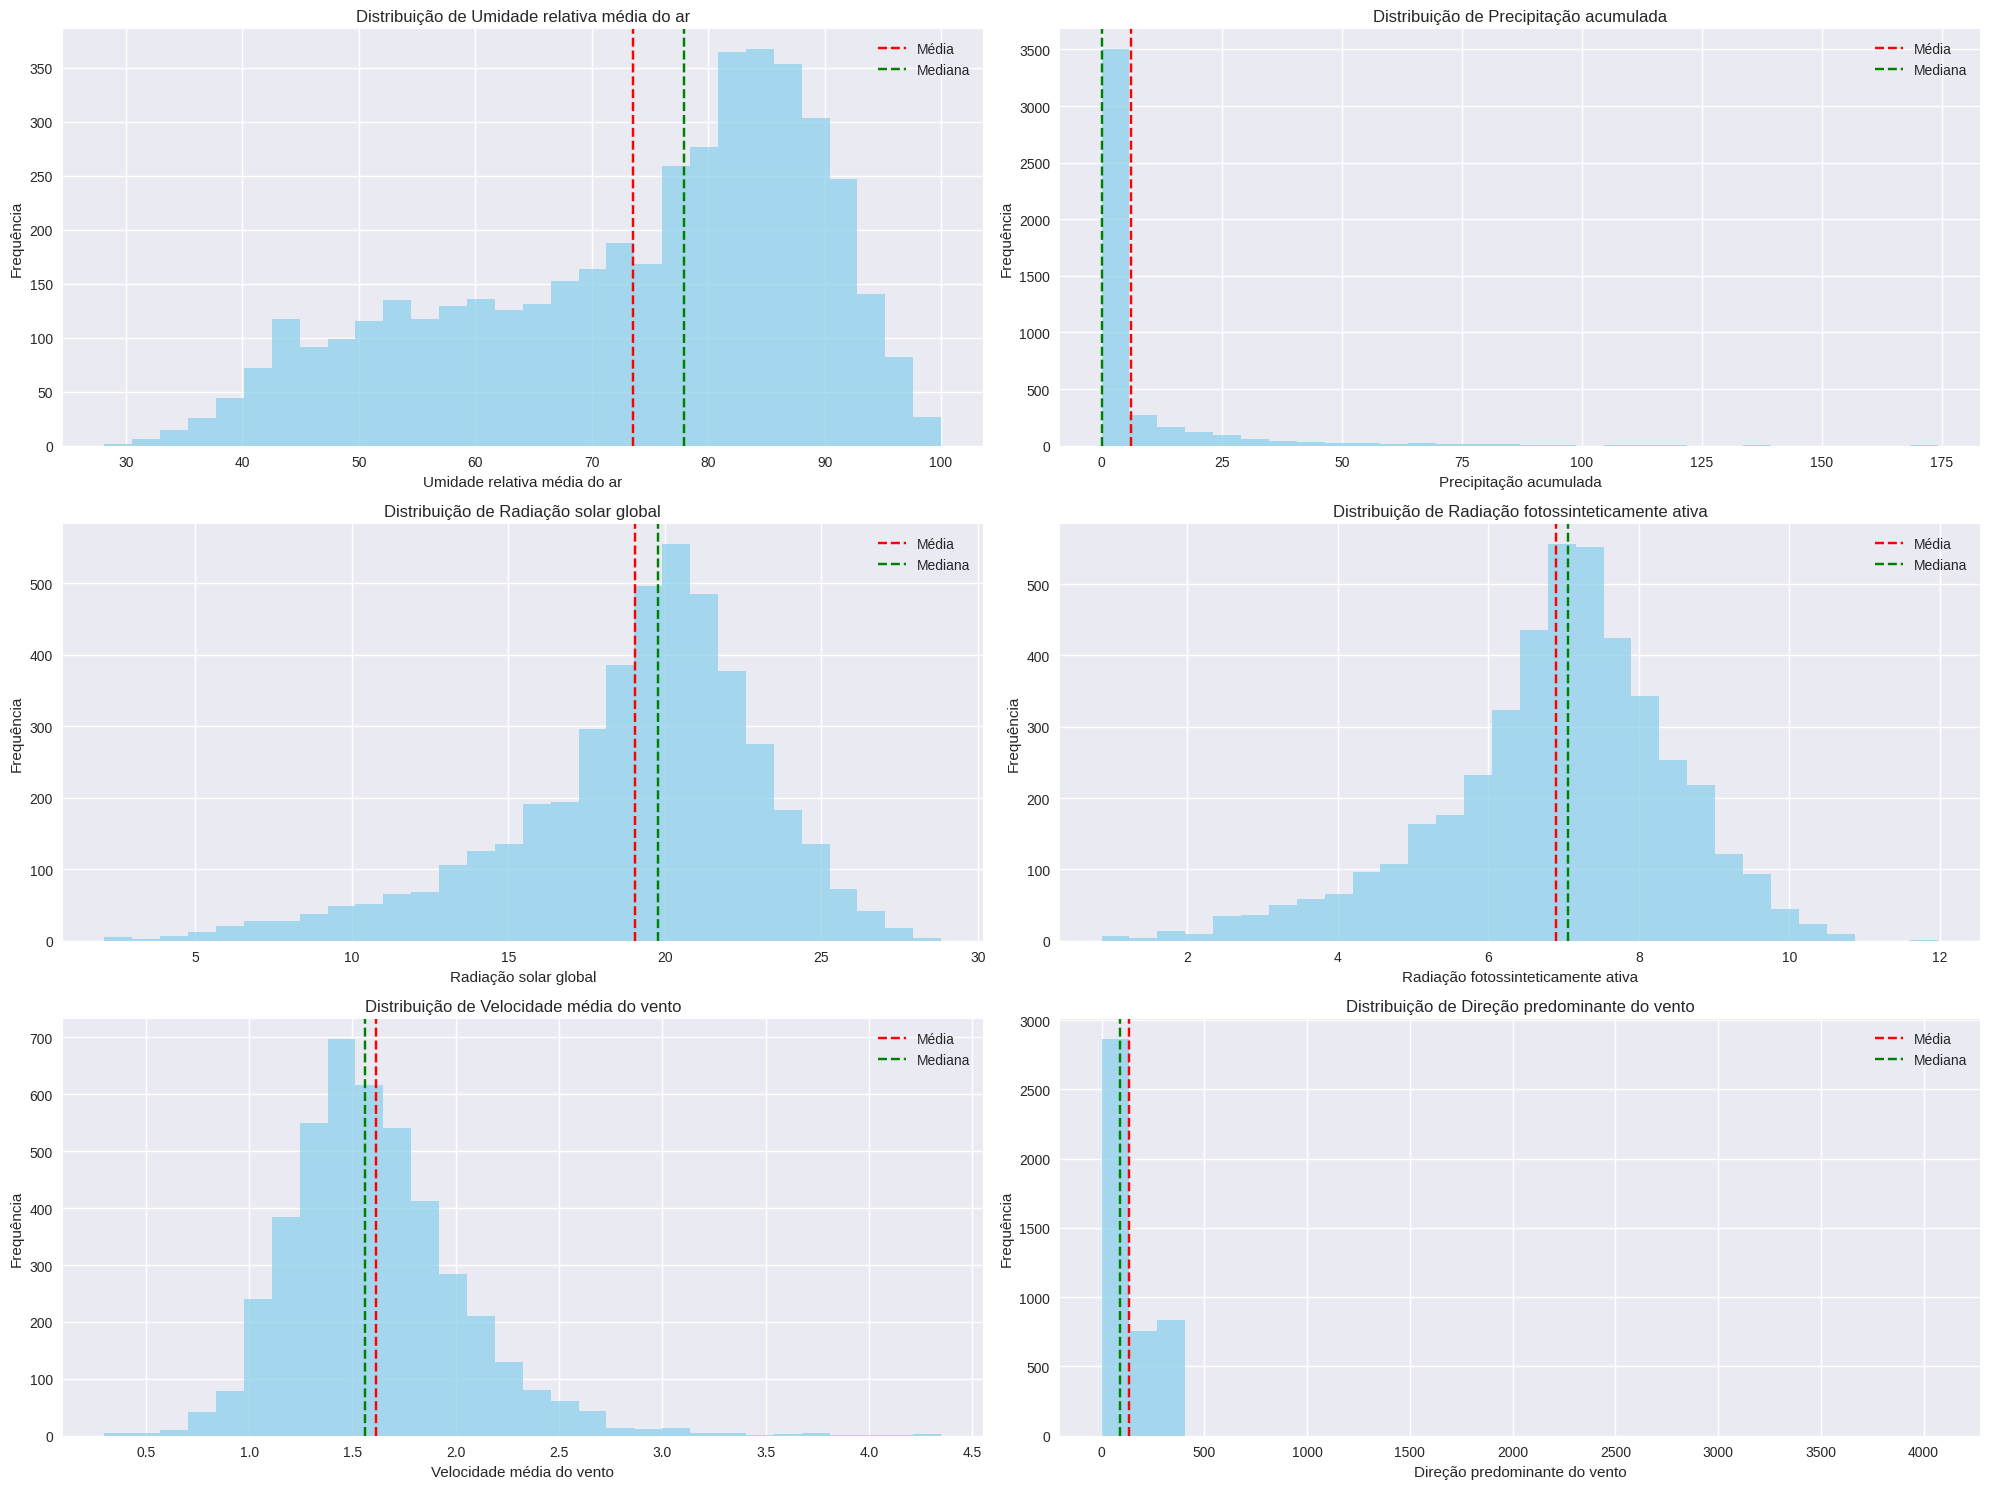

In [12]:
# Histogramas para variáveis principais (incluindo as novas)
plt.figure(figsize=(20, 15))
variaveis_principais = [
    'Umidade relativa média do ar',
    'Precipitação acumulada',
    'Radiação solar global',
    'Radiação fotossinteticamente ativa',
    'Velocidade média do vento',
    'Direção predominante do vento'
]

for i, col in enumerate(variaveis_principais, 1):
    plt.subplot(3, 2, i)
    df[col].hist(bins=30, alpha=0.7, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    # Adicionar linhas verticais para média e mediana
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Média')
    plt.axvline(df[col].median(), color='green', linestyle='--', label='Mediana')
    plt.legend()

plt.tight_layout()
plt.show()

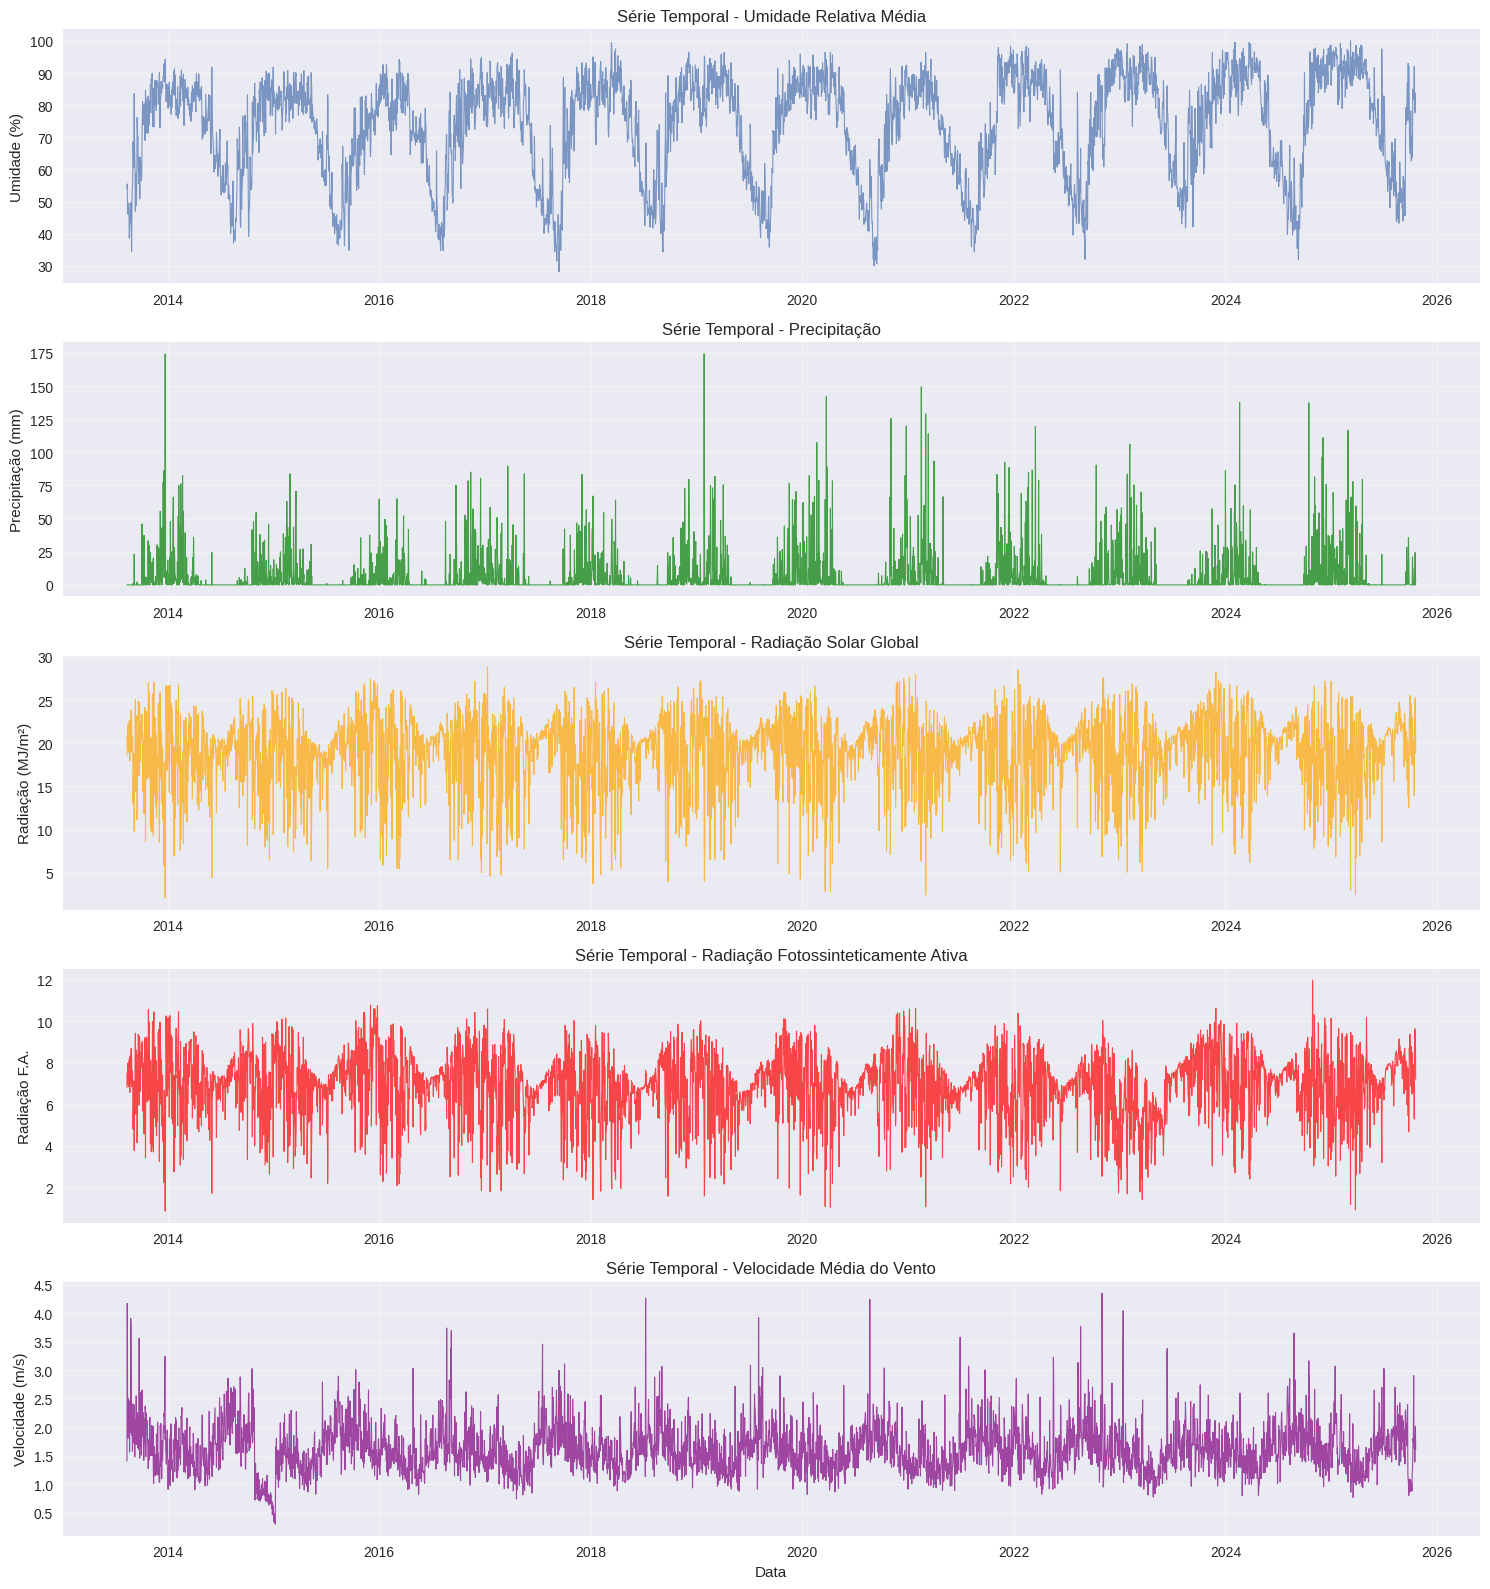

In [13]:
# Plotar série temporal das variáveis principais usando a coluna Data
plt.figure(figsize=(15, 16))

# Umidade Relativa
plt.subplot(5, 1, 1)
plt.plot(df['Data'], df['Umidade relativa média do ar'], alpha=0.7, linewidth=0.8)
plt.title('Série Temporal - Umidade Relativa Média')
plt.ylabel('Umidade (%)')
plt.grid(alpha=0.3)

# Precipitação
plt.subplot(5, 1, 2)
plt.plot(df['Data'], df['Precipitação acumulada'], alpha=0.7, color='green', linewidth=0.8)
plt.title('Série Temporal - Precipitação')
plt.ylabel('Precipitação (mm)')
plt.grid(alpha=0.3)

# Radiação Solar
plt.subplot(5, 1, 3)
plt.plot(df['Data'], df['Radiação solar global'], alpha=0.7, color='orange', linewidth=0.8)
plt.title('Série Temporal - Radiação Solar Global')
plt.ylabel('Radiação (MJ/m²)')
plt.grid(alpha=0.3)

# Radiação Fotossinteticamente Ativa
plt.subplot(5, 1, 4)
plt.plot(df['Data'], df['Radiação fotossinteticamente ativa'], alpha=0.7, color='red', linewidth=0.8)
plt.title('Série Temporal - Radiação Fotossinteticamente Ativa')
plt.ylabel('Radiação F.A.')
plt.grid(alpha=0.3)

# Velocidade do Vento
plt.subplot(5, 1, 5)
plt.plot(df['Data'], df['Velocidade média do vento'], alpha=0.7, color='purple', linewidth=0.8)
plt.title('Série Temporal - Velocidade Média do Vento')
plt.ylabel('Velocidade (m/s)')
plt.xlabel('Data')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

=== ANÁLISE DA DIREÇÃO DO VENTO - ROSE PLOT ANUAL ===
Anos disponíveis: [np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
Total de anos: 13
Valores únicos de direção do vento: [359.5  194.6  179.2  123.7  126.9  118.9   80.7   81.6   76.28  56.57]
Layout: 4 linhas x 4 colunas


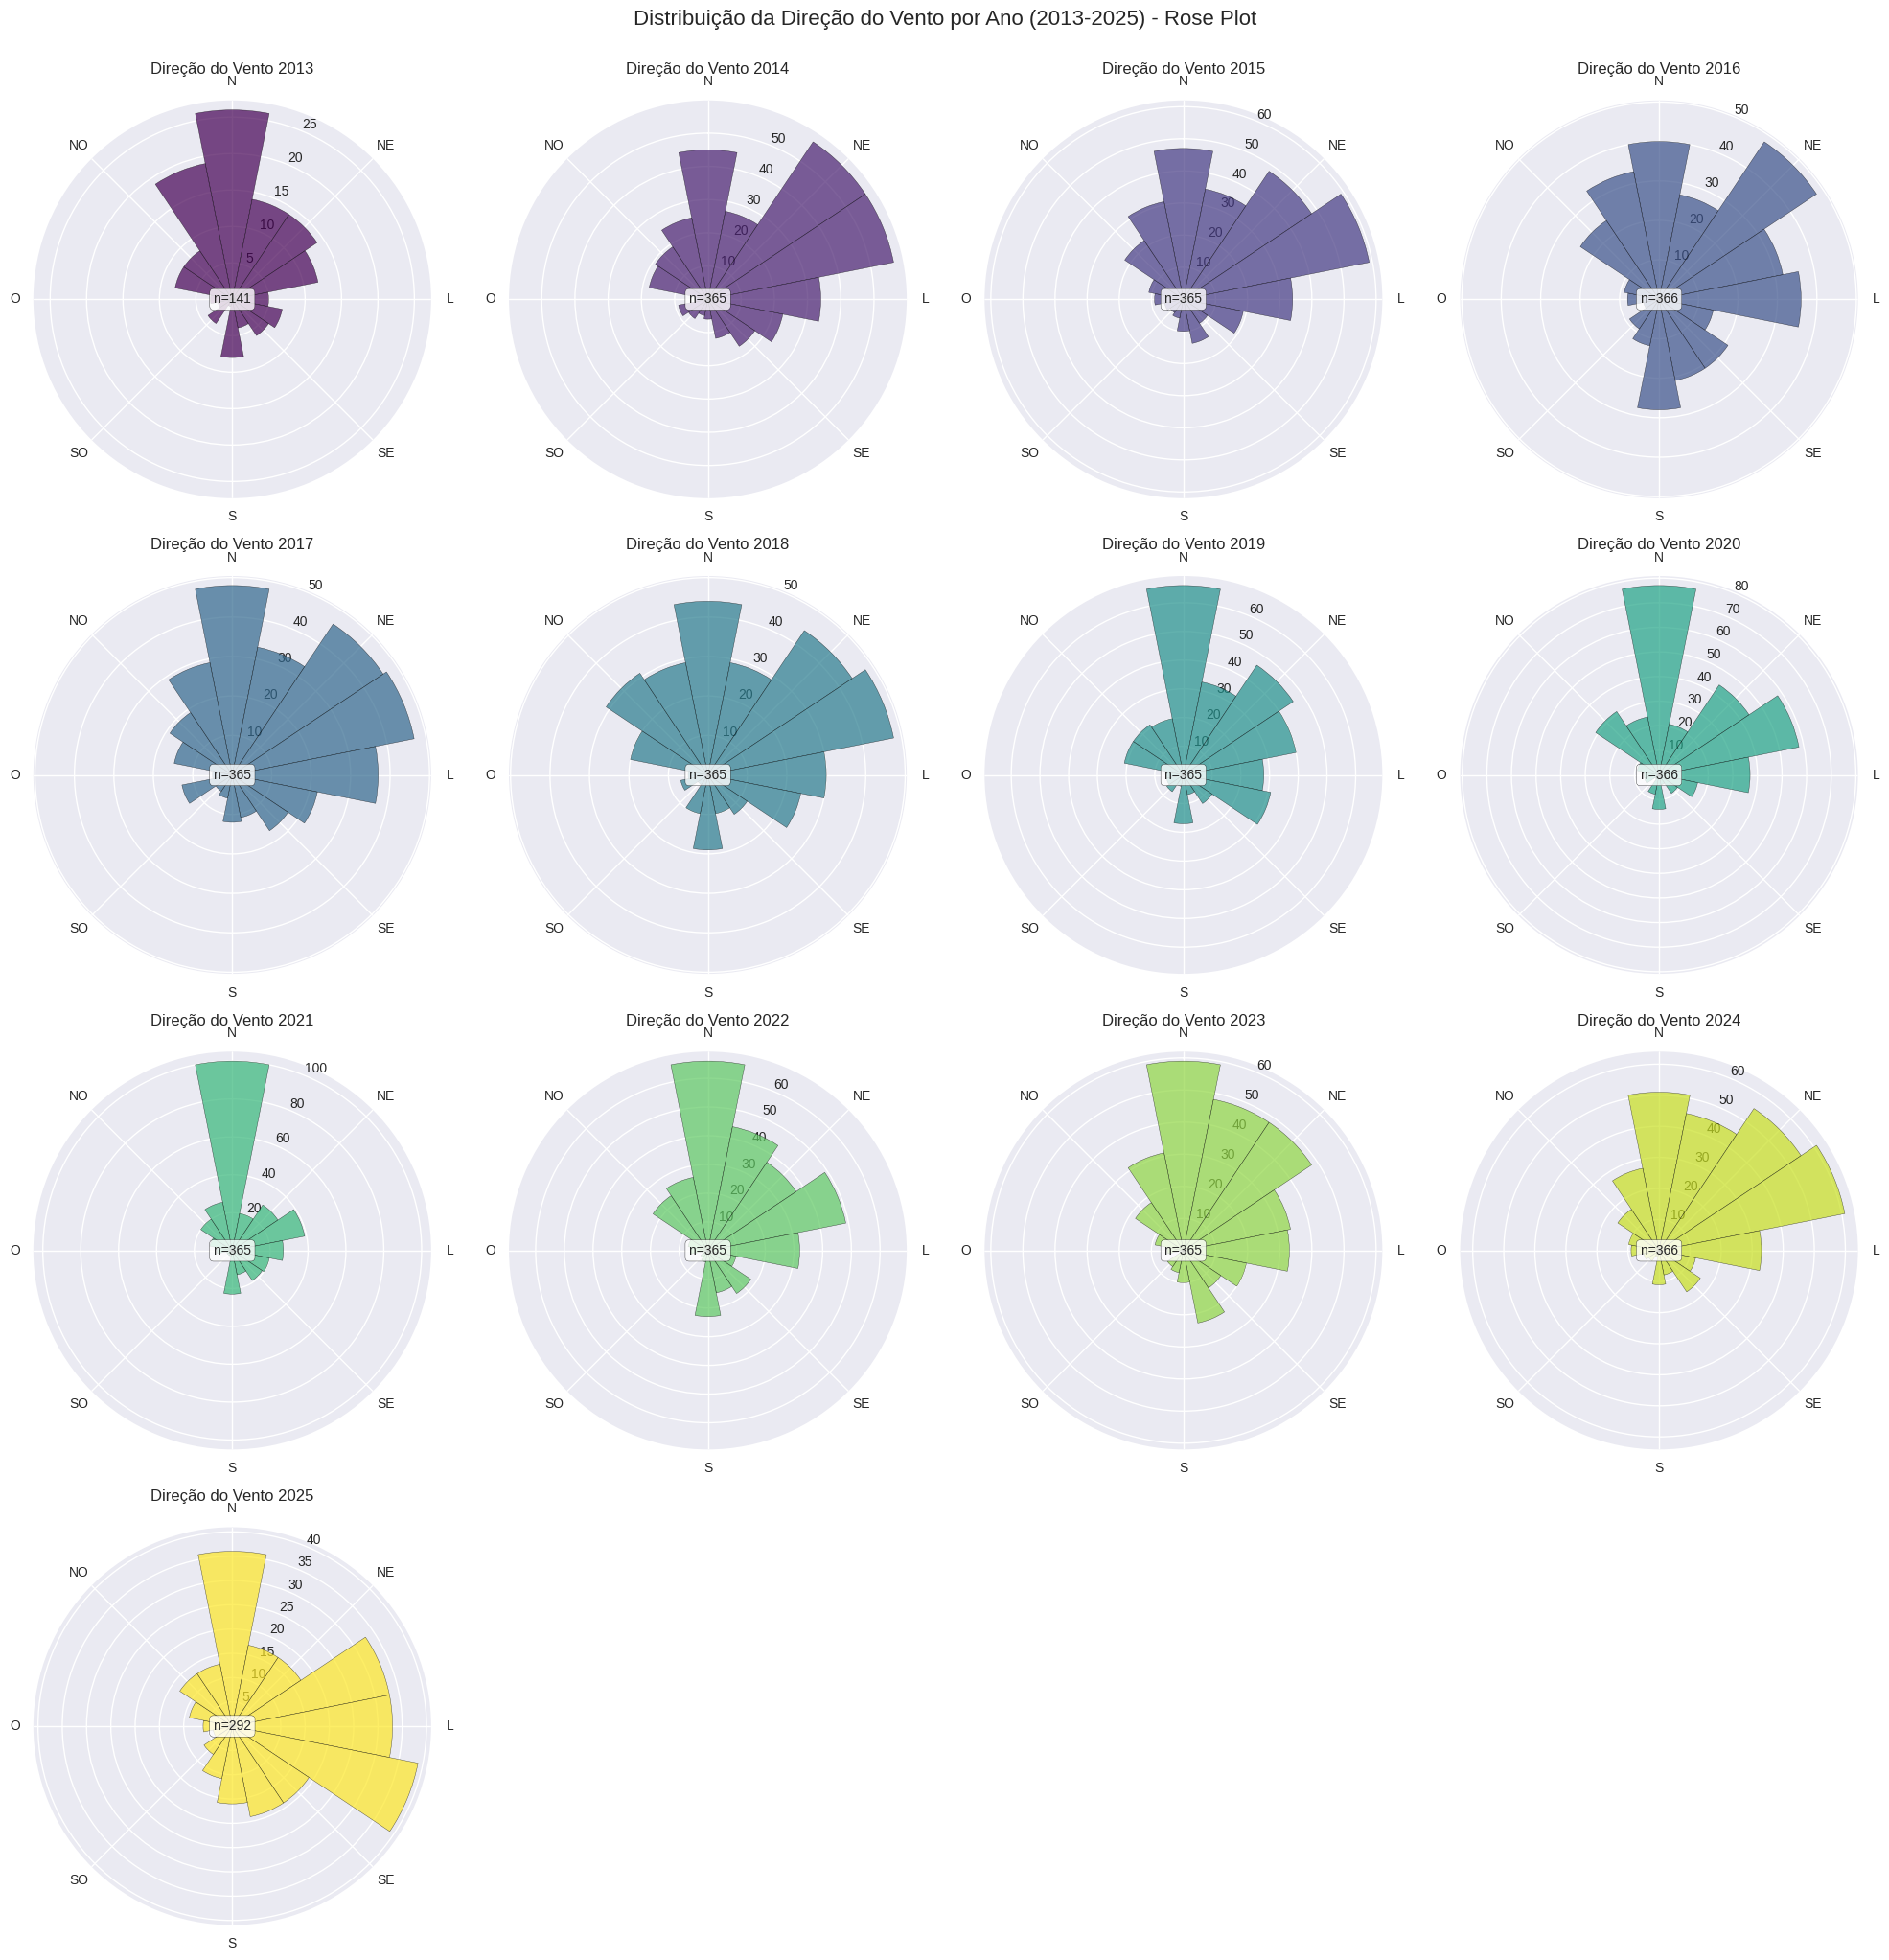


=== ESTATÍSTICAS DA DIREÇÃO DO VENTO ===
Período: 2013 - 2025
Valores únicos: 2984
Valor mínimo: 0.0°
Valor máximo: 4071.0°
Média: 131.0°
Mediana: 90.9°

=== DIREÇÃO PREDOMINANTE POR ANO ===
2013: Moda = 0.0°, Média = 148.6°, n = 141
2014: Moda = 0.0°, Média = 129.1°, n = 365
2015: Moda = 0.0°, Média = 132.0°, n = 365
2016: Moda = 0.0°, Média = 146.6°, n = 366
2017: Moda = 0.0°, Média = 134.0°, n = 365
2018: Moda = 0.0°, Média = 144.7°, n = 365
2019: Moda = 0.0°, Média = 126.7°, n = 365
2020: Moda = 0.0°, Média = 123.2°, n = 366
2021: Moda = 0.0°, Média = 120.4°, n = 365
2022: Moda = 0.0°, Média = 121.1°, n = 365
2023: Moda = 0.0°, Média = 123.0°, n = 365
2024: Moda = 0.0°, Média = 129.3°, n = 366
2025: Moda = 0.0°, Média = 136.3°, n = 292


In [14]:
print("=== ANÁLISE DA DIREÇÃO DO VENTO - ROSE PLOT ANUAL ===")

# Verificar se temos dados de direção do vento
if 'Direção predominante do vento' in df.columns:

    # Extrair ano da coluna Data
    df['Ano'] = df['Data'].dt.year
    anos = sorted(df['Ano'].unique())

    print(f"Anos disponíveis: {anos}")
    print(f"Total de anos: {len(anos)}")
    print(f"Valores únicos de direção do vento: {df['Direção predominante do vento'].unique()[:10]}")

    # Calcular layout dinâmico baseado no número de anos
    n_anos = len(anos)
    n_cols = 4  # Máximo de 4 colunas
    n_rows = (n_anos + n_cols - 1) // n_cols  # Arredondar para cima

    print(f"Layout: {n_rows} linhas x {n_cols} colunas")

    # Configurar o gráfico de rosa com layout dinâmico
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows),
                           subplot_kw=dict(projection='polar'))

    # Se tiver apenas uma linha, transformar em array 2D
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)

    axes = axes.flatten()

    # Cor para cada ano
    cores = plt.cm.viridis(np.linspace(0, 1, len(anos)))

    for i, ano in enumerate(anos):
        if i >= len(axes):  # Safety check
            break

        # Filtrar dados do ano
        dados_ano = df[df['Ano'] == ano]['Direção predominante do vento'].dropna()

        if len(dados_ano) > 0:
            # Converter para radianos para o plot polar
            # Assumindo que a direção está em graus (0-360)
            theta = np.radians(dados_ano)

            # Criar histograma de direções (16 setores)
            n_bins = 16
            hist, bins = np.histogram(theta, bins=n_bins, range=(0, 2*np.pi))

            # Plotar no gráfico polar
            width = 2 * np.pi / n_bins
            bars = axes[i].bar(bins[:-1], hist, width=width, alpha=0.7,
                             color=cores[i], edgecolor='black')

            # Configurar o gráfico
            axes[i].set_title(f'Direção do Vento {ano}', fontsize=12, pad=20)
            axes[i].set_theta_zero_location('N')  # Norte no topo
            axes[i].set_theta_direction(-1)  # Sentido horário
            axes[i].set_xticks(np.pi/180. * np.arange(0, 360, 45))
            axes[i].set_xticklabels(['N', 'NE', 'L', 'SE', 'S', 'SO', 'O', 'NO'])

            # Adicionar contagem total
            axes[i].text(0.5, 0.5, f'n={len(dados_ano)}', transform=axes[i].transAxes,
                       ha='center', va='center', fontsize=10,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))
        else:
            axes[i].set_title(f'{ano} - Sem dados', fontsize=12)
            axes[i].text(0.5, 0.5, 'Sem dados', transform=axes[i].transAxes,
                       ha='center', va='center', fontsize=10)

    # Remover eixos vazios se necessário
    for j in range(len(anos), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle(f'Distribuição da Direção do Vento por Ano ({anos[0]}-{anos[-1]}) - Rose Plot',
                fontsize=16, y=1.02)
    plt.show()

    # Estatísticas descritivas da direção do vento
    print("\n=== ESTATÍSTICAS DA DIREÇÃO DO VENTO ===")
    print(f"Período: {anos[0]} - {anos[-1]}")
    print(f"Valores únicos: {df['Direção predominante do vento'].nunique()}")
    print(f"Valor mínimo: {df['Direção predominante do vento'].min()}°")
    print(f"Valor máximo: {df['Direção predominante do vento'].max()}°")
    print(f"Média: {df['Direção predominante do vento'].mean():.1f}°")
    print(f"Mediana: {df['Direção predominante do vento'].median():.1f}°")

    # Direção predominante por ano
    print("\n=== DIREÇÃO PREDOMINANTE POR ANO ===")
    for ano in anos:
        dados_ano = df[df['Ano'] == ano]['Direção predominante do vento'].dropna()
        if len(dados_ano) > 0:
            moda = dados_ano.mode()
            media = dados_ano.mean()
            if len(moda) > 0:
                print(f"{ano}: Moda = {moda.iloc[0]}°, Média = {media:.1f}°, n = {len(dados_ano)}")
        else:
            print(f"{ano}: Sem dados disponíveis")

else:
    print("Coluna 'Direção predominante do vento' não encontrada no DataFrame")

In [15]:
print("=== IDENTIFICAÇÃO DE OUTLIERS (Método IQR) ===")

def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Verificar outliers nas variáveis principais (incluindo as novas)
variaveis_analise = [
    'Umidade relativa média do ar',
    'Precipitação acumulada',
    'Radiação solar global',
    'Radiação fotossinteticamente ativa',
    'Velocidade média do vento',
    'Direção predominante do vento'
]

# Adicionar temperatura se existir
if 'Temperatura média do ar' in df.columns:
    variaveis_analise.append('Temperatura média do ar')

print("Análise de Outliers:")
for col in variaveis_analise:
    outliers = detect_outliers_iqr(df[col])
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

=== IDENTIFICAÇÃO DE OUTLIERS (Método IQR) ===
Análise de Outliers:
Umidade relativa média do ar: 0 outliers (0.00%)
Precipitação acumulada: 747 outliers (16.74%)
Radiação solar global: 208 outliers (4.66%)
Radiação fotossinteticamente ativa: 172 outliers (3.85%)
Velocidade média do vento: 114 outliers (2.55%)
Direção predominante do vento: 1 outliers (0.02%)
Temperatura média do ar: 122 outliers (2.73%)


=== MATRIZ DE CORRELAÇÃO ===


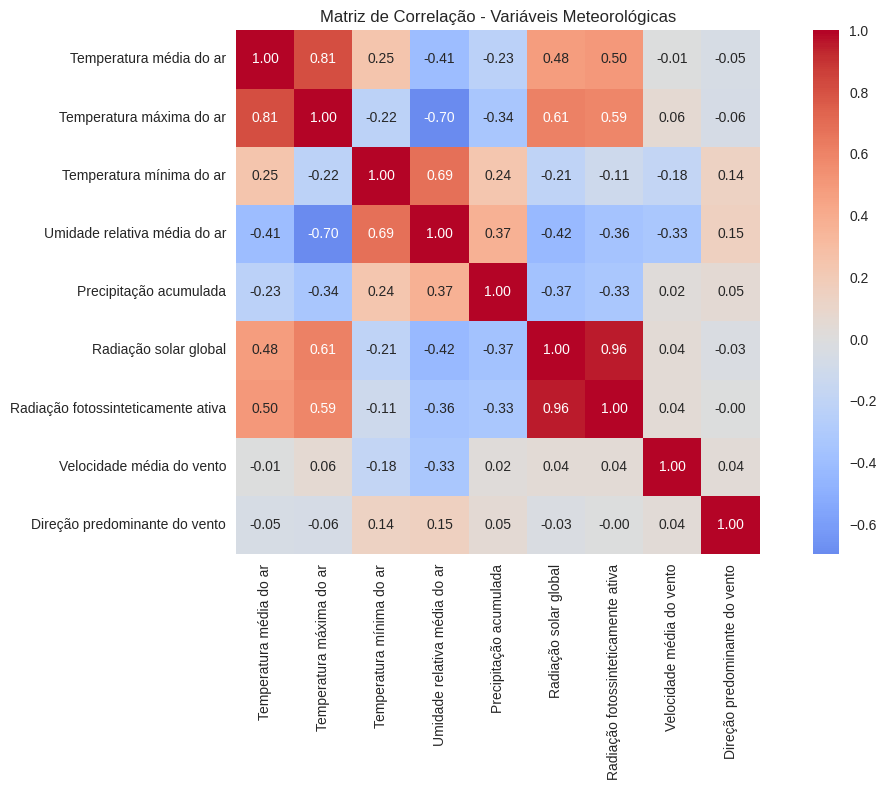

In [16]:
print("=== MATRIZ DE CORRELAÇÃO ===")

# Variáveis para análise de correlação
variaveis_correlacao = [
    'Temperatura média do ar', 'Temperatura máxima do ar', 'Temperatura mínima do ar',
    'Umidade relativa média do ar', 'Precipitação acumulada',
    'Radiação solar global', 'Radiação fotossinteticamente ativa',
    'Velocidade média do vento', 'Direção predominante do vento'
]

# Calcular matriz de correlação
correlation_matrix = df[variaveis_correlacao].corr()

# Visualizar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Meteorológicas')
plt.tight_layout()
plt.show()

=== ANÁLISE DE SAZONALIDADE ===


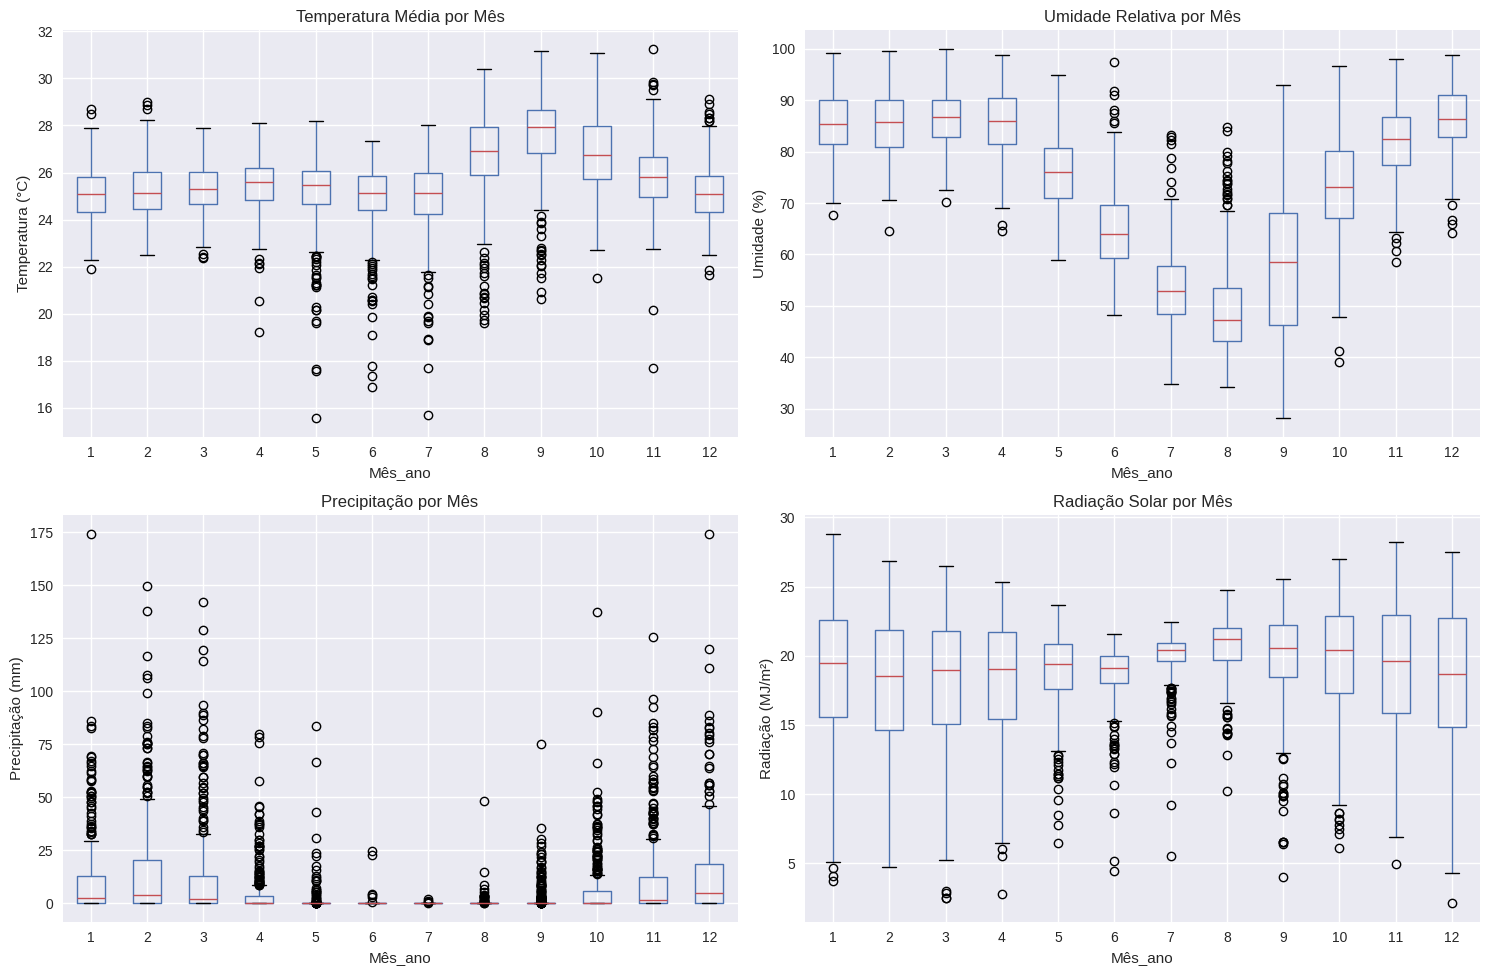

In [17]:
print("=== ANÁLISE DE SAZONALIDADE ===")

# Adicionar coluna de mês para análise sazonal
df['Mês_ano'] = df['Data'].dt.month

# Boxplots por mês para variáveis principais
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Temperatura por mês
df.boxplot(column='Temperatura média do ar', by='Mês_ano', ax=axes[0,0])
axes[0,0].set_title('Temperatura Média por Mês')
axes[0,0].set_ylabel('Temperatura (°C)')

# Umidade por mês
df.boxplot(column='Umidade relativa média do ar', by='Mês_ano', ax=axes[0,1])
axes[0,1].set_title('Umidade Relativa por Mês')
axes[0,1].set_ylabel('Umidade (%)')

# Precipitação por mês
df.boxplot(column='Precipitação acumulada', by='Mês_ano', ax=axes[1,0])
axes[1,0].set_title('Precipitação por Mês')
axes[1,0].set_ylabel('Precipitação (mm)')

# Radiação por mês
df.boxplot(column='Radiação solar global', by='Mês_ano', ax=axes[1,1])
axes[1,1].set_title('Radiação Solar por Mês')
axes[1,1].set_ylabel('Radiação (MJ/m²)')

plt.suptitle('')  # Remove título automático
plt.tight_layout()
plt.show()

=== ANÁLISE DE AUTOCORRELAÇÃO ===


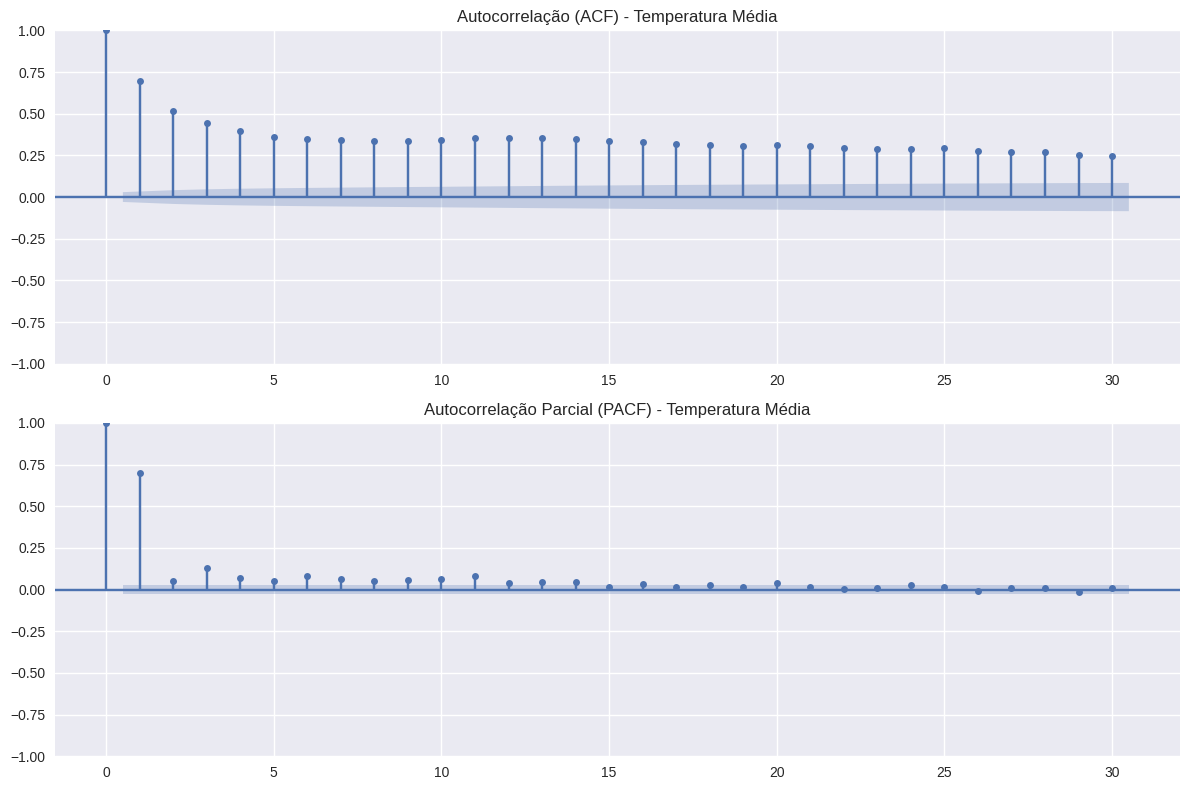

In [18]:
print("=== ANÁLISE DE AUTOCORRELAÇÃO ===")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF e PACF para temperatura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Temperatura média do ar'].dropna(), ax=ax1, lags=30)
ax1.set_title('Autocorrelação (ACF) - Temperatura Média')

plot_pacf(df['Temperatura média do ar'].dropna(), ax=ax2, lags=30)
ax2.set_title('Autocorrelação Parcial (PACF) - Temperatura Média')

plt.tight_layout()
plt.show()

In [19]:
# Lags para variáveis principais (1, 2, 3 dias)
lags_variables = ['Temperatura máxima do ar', 'Umidade relativa média do ar',
                 'Precipitação acumulada', 'Radiação solar global']
lags_days = [1, 2, 3]

In [20]:
# Médias móveis de 3 dias
rolling_variables = ['Temperatura máxima do ar', 'Umidade relativa média do ar',
                    'Precipitação acumulada']
window_size = 3

In [21]:
# Dummies de mês e estação
seasonal_features = {
    'month': True,           # Dummy de mês (1-12)
    'season_dry_wet': True,  # Estação seca/chuvosa
    'day_of_year_cyclic': True  # Codificação cíclica
}

In [22]:
transformations = {
    'Precipitação acumulada': 'log1p',  # Para assimetria positiva
    'other_variables': 'standardize'    # StandardScaler para demais
}

In [23]:
print("=== PASSO 3 - DEFINIÇÃO DE VARIÁVEIS ALVO E PREDITORAS ===")

# 1. Criar variáveis alvo (D+1) - previsão para o próximo dia
df['Tmax_alvo'] = df['Temperatura máxima do ar'].shift(-1)
df['UR_alvo'] = df['Umidade relativa média do ar'].shift(-1)
df['Precip_alvo'] = df['Precipitação acumulada'].shift(-1)

print("✅ Variáveis alvo criadas:")
print("   - Tmax_alvo (Temperatura máxima D+1)")
print("   - UR_alvo (Umidade relativa média D+1)")
print("   - Precip_alvo (Precipitação acumulada D+1)")

=== PASSO 3 - DEFINIÇÃO DE VARIÁVEIS ALVO E PREDITORAS ===
✅ Variáveis alvo criadas:
   - Tmax_alvo (Temperatura máxima D+1)
   - UR_alvo (Umidade relativa média D+1)
   - Precip_alvo (Precipitação acumulada D+1)


In [24]:
# 2. Lista de preditoras base (variáveis do dia atual)
preditoras_base = [
    'Temperatura máxima do ar',
    'Umidade relativa média do ar',
    'Precipitação acumulada',
    'Radiação solar global',
    'Velocidade média do vento',
    'Direção predominante do vento'
]

print(f"\n✅ Preditoras base selecionadas ({len(preditoras_base)} variáveis):")
for pred in preditoras_base:
    print(f"   - {pred}")


✅ Preditoras base selecionadas (6 variáveis):
   - Temperatura máxima do ar
   - Umidade relativa média do ar
   - Precipitação acumulada
   - Radiação solar global
   - Velocidade média do vento
   - Direção predominante do vento


In [25]:
# 3. Verificar valores nulos e estatísticas
print("\n=== VERIFICAÇÃO DE QUALIDADE ===")

# Valores nulos nas variáveis alvo
null_alvo = df[['Tmax_alvo', 'UR_alvo', 'Precip_alvo']].isnull().sum()
print("Valores nulos nas variáveis alvo:")
for var, null_count in null_alvo.items():
    print(f"   {var}: {null_count} nulos ({null_count/len(df)*100:.2f}%)")

# Estatísticas das variáveis alvo
print("\nEstatísticas das variáveis alvo:")
alvo_stats = df[['Tmax_alvo', 'UR_alvo', 'Precip_alvo']].describe()
print(alvo_stats)


=== VERIFICAÇÃO DE QUALIDADE ===
Valores nulos nas variáveis alvo:
   Tmax_alvo: 13 nulos (0.29%)
   UR_alvo: 13 nulos (0.29%)
   Precip_alvo: 13 nulos (0.29%)

Estatísticas das variáveis alvo:
         Tmax_alvo      UR_alvo  Precip_alvo
count  4450.000000  4450.000000  4450.000000
mean     33.145807    73.510551     6.201558
std       2.843625    15.654579    15.570037
min      22.900000    28.150000     0.000000
25%      31.580000    61.875000     0.000000
50%      33.110000    77.895000     0.000000
75%      34.810000    85.900000     3.810000
max      40.870000   100.000000   174.200000


In [26]:
# 4. Criar features temporais básicas para engenharia de atributos
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month
df['Dia_ano'] = df['Data'].dt.dayofyear

print(f"\n✅ Features temporais criadas:")
print(f"   Período dos dados: {df['Data'].min()} até {df['Data'].max()}")
print(f"   Total de dias: {len(df)}")
print(f"   Anos abrangidos: {df['Ano'].min()} - {df['Ano'].max()}")


✅ Features temporais criadas:
   Período dos dados: 2013-08-13 00:00:00 até 2025-10-31 00:00:00
   Total de dias: 4463
   Anos abrangidos: 2013 - 2025


In [27]:
# 5. Definir estratégia para engenharia de features
print("\n=== ESTRATÉGIA PARA ENGENHARIA DE FEATURES (PRÓXIMO PASSO) ===")

lags_config = {
    'variaveis': ['Temperatura máxima do ar', 'Umidade relativa média do ar',
                 'Precipitação acumulada', 'Radiação Solar global'],
    'dias': [1, 2, 3]
}

medias_moveis_config = {
    'variaveis': ['Temperatura máxima do ar', 'Umidade relativa média do ar',
                 'Precipitação acumulada'],
    'janela': 3
}

sazonais_config = {
    'mes_dummy': True,
    'estacao_seca_chuvosa': True,
    'dia_ano_ciclico': True
}

print("📋 Configuração para lags:", lags_config)
print("📋 Configuração para médias móveis:", medias_moveis_config)
print("📋 Configuração para features sazonais:", sazonais_config)


=== ESTRATÉGIA PARA ENGENHARIA DE FEATURES (PRÓXIMO PASSO) ===
📋 Configuração para lags: {'variaveis': ['Temperatura máxima do ar', 'Umidade relativa média do ar', 'Precipitação acumulada', 'Radiação Solar global'], 'dias': [1, 2, 3]}
📋 Configuração para médias móveis: {'variaveis': ['Temperatura máxima do ar', 'Umidade relativa média do ar', 'Precipitação acumulada'], 'janela': 3}
📋 Configuração para features sazonais: {'mes_dummy': True, 'estacao_seca_chuvosa': True, 'dia_ano_ciclico': True}


In [28]:
# 6. Verificação final do dataset
print("\n=== VERIFICAÇÃO FINAL DO DATASET ===")
print(f"Dimensões do DataFrame: {df.shape}")
print(f"Colunas disponíveis: {len(df.columns)}")
print(f"Amostra das primeiras linhas com variáveis alvo:")
display(df[['Data', 'Temperatura máxima do ar', 'Tmax_alvo',
           'Umidade relativa média do ar', 'UR_alvo',
           'Precipitação acumulada', 'Precip_alvo']].head(10))


=== VERIFICAÇÃO FINAL DO DATASET ===
Dimensões do DataFrame: (4463, 26)
Colunas disponíveis: 26
Amostra das primeiras linhas com variáveis alvo:


,Data,Temperatura máxima do ar,Tmax_alvo,Umidade relativa média do ar,UR_alvo,Precipitação acumulada,Precip_alvo
0,2013-08-13,36.06,30.52,54.09,55.49,0.0,0.0
1,2013-08-14,30.52,29.86,55.49,46.33,0.0,0.0
2,2013-08-15,29.86,35.76,46.33,46.13,0.0,0.0
3,2013-08-16,35.76,36.33,46.13,47.76,0.0,0.0
4,2013-08-17,36.33,36.36,47.76,45.92,0.0,0.0
5,2013-08-18,36.36,36.38,45.92,49.54,0.0,0.0
6,2013-08-19,36.38,36.18,49.54,46.84,0.0,0.0
7,2013-08-20,36.18,36.44,46.84,38.67,0.0,0.0
8,2013-08-21,36.44,36.09,38.67,41.07,0.0,0.0
9,2013-08-22,36.09,36.23,41.07,44.46,0.0,0.0


In [29]:
print("=== 4.1. TRATAMENTO DE VALORES MISSING ===")

from sklearn.impute import KNNImputer
import numpy as np

# Verificar valores missing antes do tratamento
print("Valores missing antes do tratamento:")
missing_before = df[preditoras_base].isnull().sum()
print(missing_before[missing_before > 0])

# Estratégia: Como temos dados diários (não horários), aplicaremos KNN Imputer para dias completos
print("\nAplicando KNN Imputer para valores missing...")

# Criar imputer KNN
knn_imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean')

# Aplicar imputação nas preditoras base
df[preditoras_base] = knn_imputer.fit_transform(df[preditoras_base])

# Verificar valores missing após o tratamento
missing_after = df[preditoras_base].isnull().sum()
print("Valores missing após KNN Imputer:")
print(missing_after[missing_after > 0])

=== 4.1. TRATAMENTO DE VALORES MISSING ===
Valores missing antes do tratamento:
Temperatura máxima do ar         12
Umidade relativa média do ar     12
Precipitação acumulada           12
Radiação solar global            12
Velocidade média do vento        12
Direção predominante do vento    12
dtype: int64

Aplicando KNN Imputer para valores missing...
Valores missing após KNN Imputer:
Series([], dtype: int64)


In [30]:
print("\n=== 4.2. CRIAÇÃO DE LAGS TEMPORAIS ===")

# Variáveis para criar lags
lags_variables = [
    'Temperatura máxima do ar',
    'Umidade relativa média do ar',
    'Precipitação acumulada',
    'Radiação solar global'
]

# Criar lags para 1, 2, 3 dias
lags_days = [1, 2, 3]

for var in lags_variables:
    for lag in lags_days:
        lag_col_name = f'{var}_lag_{lag}'
        df[lag_col_name] = df[var].shift(lag)
        print(f"✅ Criado: {lag_col_name}")

print(f"Total de features de lag criadas: {len(lags_variables) * len(lags_days)}")


=== 4.2. CRIAÇÃO DE LAGS TEMPORAIS ===
✅ Criado: Temperatura máxima do ar_lag_1
✅ Criado: Temperatura máxima do ar_lag_2
✅ Criado: Temperatura máxima do ar_lag_3
✅ Criado: Umidade relativa média do ar_lag_1
✅ Criado: Umidade relativa média do ar_lag_2
✅ Criado: Umidade relativa média do ar_lag_3
✅ Criado: Precipitação acumulada_lag_1
✅ Criado: Precipitação acumulada_lag_2
✅ Criado: Precipitação acumulada_lag_3
✅ Criado: Radiação solar global_lag_1
✅ Criado: Radiação solar global_lag_2
✅ Criado: Radiação solar global_lag_3
Total de features de lag criadas: 12


In [31]:
print("\n=== 4.3. CRIAÇÃO DE MÉDIAS MÓVEIS ===")

# Variáveis para médias móveis
rolling_variables = [
    'Temperatura máxima do ar',
    'Umidade relativa média do ar',
    'Precipitação acumulada'
]

# Criar médias móveis de 3 dias
window_size = 3

for var in rolling_variables:
    ma_col_name = f'{var}_ma_{window_size}'
    df[ma_col_name] = df[var].rolling(window=window_size, min_periods=1).mean()
    print(f"✅ Criado: {ma_col_name}")

print(f"Total de features de média móvel criadas: {len(rolling_variables)}")


=== 4.3. CRIAÇÃO DE MÉDIAS MÓVEIS ===
✅ Criado: Temperatura máxima do ar_ma_3
✅ Criado: Umidade relativa média do ar_ma_3
✅ Criado: Precipitação acumulada_ma_3
Total de features de média móvel criadas: 3


In [32]:
print("\n=== 4.4. CRIAÇÃO DE FEATURES SAZONAIS ===")

# 4.4.1. Dummies de mês (1-12)
print("Criando dummies de mês...")
mes_dummies = pd.get_dummies(df['Mes'], prefix='mes')
df = pd.concat([df, mes_dummies], axis=1)
print(f"✅ Dummies de mês criadas: {mes_dummies.columns.tolist()}")

# 4.4.2. Dummy de estação seca/chuvosa
# Definição: Seca (Abr-Set) vs Chuvosa (Out-Mar) - padrão Amazônia
print("\nCriando dummy estação seca/chuvosa...")
df['estacao_seca'] = df['Mes'].apply(lambda x: 1 if 4 <= x <= 9 else 0)
print("✅ Estação seca/chuvosa criada: estacao_seca (1=seca, 0=chuvosa)")

# 4.4.3. Codificação cíclica do dia do ano
print("\nCriando codificação cíclica do dia do ano...")
df['dia_ano_sin'] = np.sin(2 * np.pi * df['Dia_ano'] / 365)
df['dia_ano_cos'] = np.cos(2 * np.pi * df['Dia_ano'] / 365)
print("✅ Codificação cíclica criada: dia_ano_sin, dia_ano_cos")


=== 4.4. CRIAÇÃO DE FEATURES SAZONAIS ===
Criando dummies de mês...
✅ Dummies de mês criadas: ['mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12']

Criando dummy estação seca/chuvosa...
✅ Estação seca/chuvosa criada: estacao_seca (1=seca, 0=chuvosa)

Criando codificação cíclica do dia do ano...
✅ Codificação cíclica criada: dia_ano_sin, dia_ano_cos


In [33]:
print("\n=== 4.5. TRANSFORMAÇÕES DAS VARIÁVEIS ===")

from sklearn.preprocessing import StandardScaler
import numpy as np

# 4.5.1. Transformação log1p para precipitação (original e lags)
print("Aplicando log1p para precipitação...")
precip_cols = [col for col in df.columns if 'Precipitação' in col and 'lag' in col]
precip_cols.append('Precipitação acumulada')

for col in precip_cols:
    if col in df.columns:
        df[f'{col}_log1p'] = np.log1p(df[col])
        print(f"✅ Transformada: {col} -> {col}_log1p")

# 4.5.2. Identificar variáveis para padronização
# Excluir variáveis já transformadas, dummies e variáveis cíclicas
vars_to_exclude = precip_cols + ['estacao_seca', 'dia_ano_sin', 'dia_ano_cos'] + \
                 mes_dummies.columns.tolist() + ['Ano', 'Mes', 'Dia_ano', 'Data'] + \
                 ['Tmax_alvo', 'UR_alvo', 'Precip_alvo']

# Variáveis numéricas para padronizar
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
vars_to_scale = [var for var in numeric_vars if var not in vars_to_exclude and not var.endswith('_log1p')]

print(f"\nVariáveis para padronização ({len(vars_to_scale)}):")
for var in vars_to_scale:
    print(f"  - {var}")

# Aplicar StandardScaler
print("\nAplicando StandardScaler...")
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[vars_to_scale]),
                        columns=[f'{var}_scaled' for var in vars_to_scale],
                        index=df.index)
df = pd.concat([df, df_scaled], axis=1)
print("✅ Padronização concluída")


=== 4.5. TRANSFORMAÇÕES DAS VARIÁVEIS ===
Aplicando log1p para precipitação...
✅ Transformada: Precipitação acumulada_lag_1 -> Precipitação acumulada_lag_1_log1p
✅ Transformada: Precipitação acumulada_lag_2 -> Precipitação acumulada_lag_2_log1p
✅ Transformada: Precipitação acumulada_lag_3 -> Precipitação acumulada_lag_3_log1p
✅ Transformada: Precipitação acumulada -> Precipitação acumulada_log1p

Variáveis para padronização (25):
  - Temperatura média do ar
  - Temperatura máxima do ar
  - Temperatura mínima do ar
  - Umidade relativa média do ar
  - Umidade relativa máxima do ar
  - Umidade relativa mínima do ar
  - Velocidade máxima do vento
  - Radiação solar global
  - Radiação fotossinteticamente ativa
  - Velocidade média do vento
  - Direção predominante do vento
  - Mês_num
  - Mês_ano
  - Temperatura máxima do ar_lag_1
  - Temperatura máxima do ar_lag_2
  - Temperatura máxima do ar_lag_3
  - Umidade relativa média do ar_lag_1
  - Umidade relativa média do ar_lag_2
  - Umidade

In [34]:
print("\n=== 4.6. RESUMO DAS FEATURES CRIADAS ===")

# Contar tipos de features
lag_features = [col for col in df.columns if 'lag' in col]
ma_features = [col for col in df.columns if 'ma_' in col]
month_features = [col for col in df.columns if 'mes_' in col]
cyclic_features = ['dia_ano_sin', 'dia_ano_cos']
season_features = ['estacao_seca']
log_features = [col for col in df.columns if 'log1p' in col]
scaled_features = [col for col in df.columns if 'scaled' in col]

print(f"📊 Total de features criadas por categoria:")
print(f"   • Lags temporais: {len(lag_features)}")
print(f"   • Médias móveis: {len(ma_features)}")
print(f"   • Dummies de mês: {len(month_features)}")
print(f"   • Features cíclicas: {len(cyclic_features)}")
print(f"   • Features de estação: {len(season_features)}")
print(f"   • Transformações log1p: {len(log_features)}")
print(f"   • Variáveis padronizadas: {len(scaled_features)}")
print(f"   • Total de colunas no DataFrame: {len(df.columns)}")

# Mostrar algumas features de exemplo
print(f"\n🔍 Exemplos de features criadas:")
print(f"   Lags: {lag_features[:3]}...")
print(f"   Médias móveis: {ma_features}")
print(f"   Transformadas: {log_features[:2]}...")
print(f"   Padronizadas: {scaled_features[:3]}...")


=== 4.6. RESUMO DAS FEATURES CRIADAS ===
📊 Total de features criadas por categoria:
   • Lags temporais: 24
   • Médias móveis: 6
   • Dummies de mês: 12
   • Features cíclicas: 2
   • Features de estação: 1
   • Transformações log1p: 4
   • Variáveis padronizadas: 25
   • Total de colunas no DataFrame: 85

🔍 Exemplos de features criadas:
   Lags: ['Temperatura máxima do ar_lag_1', 'Temperatura máxima do ar_lag_2', 'Temperatura máxima do ar_lag_3']...
   Médias móveis: ['Temperatura máxima do ar_ma_3', 'Umidade relativa média do ar_ma_3', 'Precipitação acumulada_ma_3', 'Temperatura máxima do ar_ma_3_scaled', 'Umidade relativa média do ar_ma_3_scaled', 'Precipitação acumulada_ma_3_scaled']
   Transformadas: ['Precipitação acumulada_lag_1_log1p', 'Precipitação acumulada_lag_2_log1p']...
   Padronizadas: ['Temperatura média do ar_scaled', 'Temperatura máxima do ar_scaled', 'Temperatura mínima do ar_scaled']...


In [35]:
print("\n=== 4.7. LIMPEZA DE VALORES NULOS ===")

# Remover linhas com valores nulos (gerados pelos lags)
initial_rows = len(df)
df_clean = df.dropna().copy()
final_rows = len(df_clean)

print(f"Linhas antes da limpeza: {initial_rows}")
print(f"Linhas após remover nulos: {final_rows}")
print(f"Linhas removidas: {initial_rows - final_rows} ({((initial_rows - final_rows)/initial_rows)*100:.2f}%)")

df = df_clean


=== 4.7. LIMPEZA DE VALORES NULOS ===
Linhas antes da limpeza: 4463
Linhas após remover nulos: 4447
Linhas removidas: 16 (0.36%)


In [36]:
print("=== 1. VERIFICAÇÃO DA ESTRUTURA DO DATAFRAME ===")

print(f"📊 Dimensões do DataFrame: {df.shape}")
print(f"📅 Período dos dados: {df['Data'].min()} até {df['Data'].max()}")
print(f"🔢 Total de colunas: {len(df.columns)}")
print(f"📝 Total de linhas após limpeza: {len(df)}")

# Verificar tipos de dados
print("\n=== TIPOS DE DADOS ===")
print(df.dtypes.value_counts())

=== 1. VERIFICAÇÃO DA ESTRUTURA DO DATAFRAME ===
📊 Dimensões do DataFrame: (4447, 85)
📅 Período dos dados: 2013-08-16 00:00:00 até 2025-10-18 00:00:00
🔢 Total de colunas: 85
📝 Total de linhas após limpeza: 4447

=== TIPOS DE DADOS ===
float64           61
bool              12
object             5
int32              4
int64              2
datetime64[ns]     1
Name: count, dtype: int64


In [37]:
print("\n=== 2. VERIFICAÇÃO DE VALORES MISSING ===")

# Verificar valores missing em todas as colunas
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

if len(missing_cols) == 0:
    print("✅ NENHUM valor missing encontrado!")
else:
    print("⚠️ Valores missing encontrados:")
    for col, count in missing_cols.items():
        print(f"   {col}: {count} valores ({count/len(df)*100:.2f}%)")


=== 2. VERIFICAÇÃO DE VALORES MISSING ===
✅ NENHUM valor missing encontrado!


In [38]:
print("\n=== 3. VERIFICAÇÃO DAS VARIÁVEIS ALVO ===")

alvo_vars = ['Tmax_alvo', 'UR_alvo', 'Precip_alvo']

for var in alvo_vars:
    print(f"\n📈 {var}:")
    print(f"   - Não nulos: {df[var].notna().sum()}")
    print(f"   - Média: {df[var].mean():.2f}")
    print(f"   - Std: {df[var].std():.2f}")
    print(f"   - Min: {df[var].min():.2f}")
    print(f"   - Max: {df[var].max():.2f}")

    # Verificar se há valores impossíveis
    if var == 'Precip_alvo':
        neg_precip = (df[var] < 0).sum()
        if neg_precip > 0:
            print(f"   ⚠️ VALORES NEGATIVOS: {neg_precip}")


=== 3. VERIFICAÇÃO DAS VARIÁVEIS ALVO ===

📈 Tmax_alvo:
   - Não nulos: 4447
   - Média: 33.15
   - Std: 2.84
   - Min: 22.90
   - Max: 40.87

📈 UR_alvo:
   - Não nulos: 4447
   - Média: 73.53
   - Std: 15.65
   - Min: 28.15
   - Max: 100.00

📈 Precip_alvo:
   - Não nulos: 4447
   - Média: 6.21
   - Std: 15.57
   - Min: 0.00
   - Max: 174.20


In [39]:
print("\n=== 4. VERIFICAÇÃO DAS FEATURES CRIADAS ===")

# Contar features por tipo
feature_types = {
    'Lags': [col for col in df.columns if 'lag' in col],
    'Médias Móveis': [col for col in df.columns if 'ma_' in col],
    'Mês Dummies': [col for col in df.columns if col.startswith('mes_')],
    'Transformações Log': [col for col in df.columns if 'log1p' in col],
    'Variáveis Escaladas': [col for col in df.columns if 'scaled' in col],
    'Features Cíclicas': ['dia_ano_sin', 'dia_ano_cos'],
    'Estação': ['estacao_seca']
}

print("📋 Resumo de Features Criadas:")
for feature_type, features in feature_types.items():
    print(f"   • {feature_type}: {len(features)} features")
    if features and len(features) <= 5:  # Mostrar até 5 exemplos
        print(f"     Ex: {features[:3]}{'...' if len(features) > 3 else ''}")

# Verificar se todas as features esperadas foram criadas
expected_features = {
    'Lags': f"Esperado: {4*3}=12 | Criado: {len(feature_types['Lags'])}",
    'Médias Móveis': f"Esperado: 3 | Criado: {len(feature_types['Médias Móveis'])}",
    'Mês Dummies': f"Esperado: 12 | Criado: {len(feature_types['Mês Dummies'])}",
    'Features Cíclicas': f"Esperado: 2 | Criado: {len(feature_types['Features Cíclicas'])}"
}

print("\n✅ Confirmação de Features:")
for feature, status in expected_features.items():
    print(f"   {feature}: {status}")


=== 4. VERIFICAÇÃO DAS FEATURES CRIADAS ===
📋 Resumo de Features Criadas:
   • Lags: 24 features
   • Médias Móveis: 6 features
   • Mês Dummies: 12 features
   • Transformações Log: 4 features
     Ex: ['Precipitação acumulada_lag_1_log1p', 'Precipitação acumulada_lag_2_log1p', 'Precipitação acumulada_lag_3_log1p']...
   • Variáveis Escaladas: 25 features
   • Features Cíclicas: 2 features
     Ex: ['dia_ano_sin', 'dia_ano_cos']
   • Estação: 1 features
     Ex: ['estacao_seca']

✅ Confirmação de Features:
   Lags: Esperado: 12=12 | Criado: 24
   Médias Móveis: Esperado: 3 | Criado: 6
   Mês Dummies: Esperado: 12 | Criado: 12
   Features Cíclicas: Esperado: 2 | Criado: 2


In [40]:
print("\n=== 5. VERIFICAÇÃO DE VALORES EXTREMOS ===")

# Verificar se há valores infinitos
inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
print(f"Valores infinitos: {inf_count}")

# Verificar outliers nas variáveis principais usando IQR
def check_outliers(series, name):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers)

print("\n🔍 Outliers nas variáveis principais (método IQR):")
main_vars = ['Tmax_alvo', 'UR_alvo', 'Precip_alvo', 'Temperatura máxima do ar',
             'Umidade relativa média do ar', 'Precipitação acumulada']

for var in main_vars:
    if var in df.columns:
        outliers = check_outliers(df[var], var)
        print(f"   {var}: {outliers} outliers ({outliers/len(df)*100:.1f}%)")


=== 5. VERIFICAÇÃO DE VALORES EXTREMOS ===
Valores infinitos: 0

🔍 Outliers nas variáveis principais (método IQR):
   Tmax_alvo: 116 outliers (2.6%)
   UR_alvo: 0 outliers (0.0%)
   Precip_alvo: 747 outliers (16.8%)
   Temperatura máxima do ar: 116 outliers (2.6%)
   Umidade relativa média do ar: 0 outliers (0.0%)
   Precipitação acumulada: 747 outliers (16.8%)


In [41]:
print("\n=== 6. VERIFICAÇÃO DA SAZONALIDADE ===")

# Verificar distribuição das estações
if 'estacao_seca' in df.columns:
    estacao_counts = df['estacao_seca'].value_counts()
    print("Distribuição das estações:")
    print(f"   Estação seca (1): {estacao_counts.get(1, 0)} dias ({estacao_counts.get(1, 0)/len(df)*100:.1f}%)")
    print(f"   Estação chuvosa (0): {estacao_counts.get(0, 0)} dias ({estacao_counts.get(0, 0)/len(df)*100:.1f}%)")

# Verificar se a codificação cíclica está correta
if all(col in df.columns for col in ['dia_ano_sin', 'dia_ano_cos']):
    print(f"\n✅ Codificação cíclica:")
    print(f"   dia_ano_sin: [{df['dia_ano_sin'].min():.3f}, {df['dia_ano_sin'].max():.3f}]")
    print(f"   dia_ano_cos: [{df['dia_ano_cos'].min():.3f}, {df['dia_ano_cos'].max():.3f}]")


=== 6. VERIFICAÇÃO DA SAZONALIDADE ===
Distribuição das estações:
   Estação seca (1): 2242 dias (50.4%)
   Estação chuvosa (0): 2205 dias (49.6%)

✅ Codificação cíclica:
   dia_ano_sin: [-1.000, 1.000]
   dia_ano_cos: [-1.000, 1.000]


In [42]:
print("\n=== 7. VERIFICAÇÃO DAS TRANSFORMAÇÕES ===")

# Verificar transformação log1p na precipitação
precip_cols = [col for col in df.columns if 'Precipitação' in col and 'log1p' in col]
if precip_cols:
    print("✅ Transformação log1p aplicada em:")
    for col in precip_cols:
        original_col = col.replace('_log1p', '')
        if original_col in df.columns:
            # Verificar se não há valores negativos após transformação
            neg_values = (df[col] < 0).sum()
            print(f"   {original_col} -> {col} (valores negativos: {neg_values})")

# Verificar padronização
scaled_cols = [col for col in df.columns if 'scaled' in col]
if scaled_cols:
    sample_scaled = scaled_cols[:3]
    print(f"\n✅ Padronização aplicada em {len(scaled_cols)} variáveis")
    print(f"   Exemplo - Estatísticas de {sample_scaled[0]}:")
    print(f"      Média: {df[sample_scaled[0]].mean():.6f} (esperado ~0)")
    print(f"      Std: {df[sample_scaled[0]].std():.6f} (esperado ~1)")


=== 7. VERIFICAÇÃO DAS TRANSFORMAÇÕES ===
✅ Transformação log1p aplicada em:
   Precipitação acumulada_lag_1 -> Precipitação acumulada_lag_1_log1p (valores negativos: 0)
   Precipitação acumulada_lag_2 -> Precipitação acumulada_lag_2_log1p (valores negativos: 0)
   Precipitação acumulada_lag_3 -> Precipitação acumulada_lag_3_log1p (valores negativos: 0)
   Precipitação acumulada -> Precipitação acumulada_log1p (valores negativos: 0)

✅ Padronização aplicada em 25 variáveis
   Exemplo - Estatísticas de Temperatura média do ar_scaled:
      Média: 0.000750 (esperado ~0)
      Std: 0.999338 (esperado ~1)


In [43]:
print("\n" + "="*50)
print("📊 RELATÓRIO FINAL DE SAÚDE DOS DADOS")
print("="*50)

# Resumo geral
issues = []

# Verificar problemas críticos
if len(df) < 1000:
    issues.append("⚠️ Dataset muito pequeno (< 1000 linhas)")

if any(df[['Tmax_alvo', 'UR_alvo', 'Precip_alvo']].isnull().sum() > 0):
    issues.append("⚠️ Variáveis alvo com valores missing")

if inf_count > 0:
    issues.append("⚠️ Valores infinitos encontrados")

if len([col for col in df.columns if 'lag' in col]) != 12:
    issues.append("⚠️ Número incorreto de features de lag")

# Resultado final
if not issues:
    print("✅ TODOS OS CHECKS PASSARAM! Dados prontos para modelagem.")
    print("   Você pode prosseguir para o Passo 5 - Divisão dos Dados")
else:
    print("❌ PROBLEMAS IDENTIFICADOS:")
    for issue in issues:
        print(f"   {issue}")
    print("\n🔧 Resolva os problemas antes de prosseguir.")

print(f"\n📈 Estatísticas finais:")
print(f"   • Linhas: {len(df)}")
print(f"   • Colunas: {len(df.columns)}")
print(f"   • Período: {df['Data'].min().strftime('%Y-%m-%d')} a {df['Data'].max().strftime('%Y-%m-%d')}")
print(f"   • Variáveis alvo: 3 (Tmax, UR, Precip - D+1)")
print(f"   • Features preditoras: {len(df.columns) - 8}")  # excluindo colunas auxiliares e alvos


📊 RELATÓRIO FINAL DE SAÚDE DOS DADOS
❌ PROBLEMAS IDENTIFICADOS:
   ⚠️ Número incorreto de features de lag

🔧 Resolva os problemas antes de prosseguir.

📈 Estatísticas finais:
   • Linhas: 4447
   • Colunas: 85
   • Período: 2013-08-16 a 2025-10-18
   • Variáveis alvo: 3 (Tmax, UR, Precip - D+1)
   • Features preditoras: 77


In [44]:
print("=== CORREÇÃO DE FEATURES DUPLICADAS ===")

# Listar todas as features atuais
all_features = df.columns.tolist()
print(f"Total de features atual: {len(all_features)}")

# Identificar features problemáticas
lags_duplicados = [col for col in df.columns if 'lag' in col and ('log1p' in col or 'scaled' in col)]
ma_duplicados = [col for col in df.columns if 'ma_' in col and ('log1p' in col or 'scaled' in col)]

print(f"\n🔍 Features de lag duplicadas: {len(lags_duplicados)}")
for lag in lags_duplicados:
    print(f"   - {lag}")

print(f"\n🔍 Features de média móvel duplicadas: {len(ma_duplicados)}")
for ma in ma_duplicados:
    print(f"   - {ma}")

# Manter apenas as features originais (sem transformações nos lags e MAs)
features_para_manter = [col for col in df.columns if not (('lag' in col or 'ma_' in col) and ('log1p' in col or 'scaled' in col))]

print(f"\n✅ Features após correção: {len(features_para_manter)}")
df = df[features_para_manter]

=== CORREÇÃO DE FEATURES DUPLICADAS ===
Total de features atual: 85

🔍 Features de lag duplicadas: 12
   - Precipitação acumulada_lag_1_log1p
   - Precipitação acumulada_lag_2_log1p
   - Precipitação acumulada_lag_3_log1p
   - Temperatura máxima do ar_lag_1_scaled
   - Temperatura máxima do ar_lag_2_scaled
   - Temperatura máxima do ar_lag_3_scaled
   - Umidade relativa média do ar_lag_1_scaled
   - Umidade relativa média do ar_lag_2_scaled
   - Umidade relativa média do ar_lag_3_scaled
   - Radiação solar global_lag_1_scaled
   - Radiação solar global_lag_2_scaled
   - Radiação solar global_lag_3_scaled

🔍 Features de média móvel duplicadas: 3
   - Temperatura máxima do ar_ma_3_scaled
   - Umidade relativa média do ar_ma_3_scaled
   - Precipitação acumulada_ma_3_scaled

✅ Features após correção: 70


In [45]:
print("\n=== CORREÇÃO DA ESTAÇÃO SECA/CHUVOSA ===")

# Para Sinop-MT (região amazônica):
# Estação SECA: Maio a Setembro (5-9)
# Estação CHUVOSA: Outubro a Abril (10-4)

# Remover a coluna antiga
if 'estacao_seca' in df.columns:
    df = df.drop('estacao_seca', axis=1)
    print("✅ Coluna antiga de estação removida")

# Criar nova definição correta
df['estacao_seca'] = df['Mes'].apply(lambda x: 1 if 5 <= x <= 9 else 0)

# Verificar nova distribuição
estacao_counts = df['estacao_seca'].value_counts().sort_index()
print("\n✅ NOVA Distribuição das estações (correta para Sinop-MT):")
print(f"   Estação seca (Maio-Set): {estacao_counts.get(1, 0)} dias ({estacao_counts.get(1, 0)/len(df)*100:.1f}%)")
print(f"   Estação chuvosa (Out-Abr): {estacao_counts.get(0, 0)} dias ({estacao_counts.get(0, 0)/len(df)*100:.1f}%)")

# Verificar se faz sentido climaticamente
print(f"\n📊 Distribuição por mês (confirmação):")
for mes in range(1, 13):
    count = len(df[df['Mes'] == mes])
    estacao = "SECA" if 5 <= mes <= 9 else "CHUVOSA"
    print(f"   Mês {mes}: {count} dias - {estacao}")


=== CORREÇÃO DA ESTAÇÃO SECA/CHUVOSA ===
✅ Coluna antiga de estação removida

✅ NOVA Distribuição das estações (correta para Sinop-MT):
   Estação seca (Maio-Set): 1882 dias (42.3%)
   Estação chuvosa (Out-Abr): 2565 dias (57.7%)

📊 Distribuição por mês (confirmação):
   Mês 1: 372 dias - CHUVOSA
   Mês 2: 339 dias - CHUVOSA
   Mês 3: 372 dias - CHUVOSA
   Mês 4: 360 dias - CHUVOSA
   Mês 5: 372 dias - SECA
   Mês 6: 360 dias - SECA
   Mês 7: 372 dias - SECA
   Mês 8: 388 dias - SECA
   Mês 9: 390 dias - SECA
   Mês 10: 390 dias - CHUVOSA
   Mês 11: 360 dias - CHUVOSA
   Mês 12: 372 dias - CHUVOSA


In [46]:
print("\n=== VERIFICAÇÃO FINAL DAS CORREÇÕES ===")

# Contar features por tipo após correção
feature_types_corrigido = {
    'Lags': [col for col in df.columns if 'lag' in col and 'log1p' not in col and 'scaled' not in col],
    'Médias Móveis': [col for col in df.columns if 'ma_' in col and 'log1p' not in col and 'scaled' not in col],
    'Mês Dummies': [col for col in df.columns if col.startswith('mes_')],
    'Transformações Log': [col for col in df.columns if 'log1p' in col],
    'Variáveis Escaladas': [col for col in df.columns if 'scaled' in col],
    'Features Cíclicas': ['dia_ano_sin', 'dia_ano_cos'],
    'Estação': ['estacao_seca']
}

print("📋 RESUMO CORRIGIDO de Features:")
for feature_type, features in feature_types_corrigido.items():
    print(f"   • {feature_type}: {len(features)} features")
    if features and len(features) <= 5:
        print(f"     Ex: {features[:3]}{'...' if len(features) > 3 else ''}")

# Verificação final
expected_corrigido = {
    'Lags': f"Esperado: 12 | Criado: {len(feature_types_corrigido['Lags'])}",
    'Médias Móveis': f"Esperado: 3 | Criado: {len(feature_types_corrigido['Médias Móveis'])}",
    'Mês Dummies': f"Esperado: 12 | Criado: {len(feature_types_corrigido['Mês Dummies'])}",
    'Features Cíclicas': f"Esperado: 2 | Criado: {len(feature_types_corrigido['Features Cíclicas'])}",
    'Estação': f"Esperado: 1 | Criado: {len(feature_types_corrigido['Estação'])}"
}

print("\n✅ CONFIRMAÇÃO CORRIGIDA:")
for feature, status in expected_corrigido.items():
    print(f"   {feature}: {status}")

# Verificar proporção da estação seca
prop_seca = estacao_counts.get(1, 0) / len(df) * 100
print(f"\n🎯 Proporção estação seca: {prop_seca:.1f}%")
if 40 <= prop_seca <= 45:  # Esperado ~41-42% para Maio-Set
    print("   ✅ Proporção CORRETA para Sinop-MT!")
else:
    print("   ⚠️ Proporção ainda pode estar incorreta")


=== VERIFICAÇÃO FINAL DAS CORREÇÕES ===
📋 RESUMO CORRIGIDO de Features:
   • Lags: 12 features
   • Médias Móveis: 3 features
     Ex: ['Temperatura máxima do ar_ma_3', 'Umidade relativa média do ar_ma_3', 'Precipitação acumulada_ma_3']
   • Mês Dummies: 12 features
   • Transformações Log: 1 features
     Ex: ['Precipitação acumulada_log1p']
   • Variáveis Escaladas: 13 features
   • Features Cíclicas: 2 features
     Ex: ['dia_ano_sin', 'dia_ano_cos']
   • Estação: 1 features
     Ex: ['estacao_seca']

✅ CONFIRMAÇÃO CORRIGIDA:
   Lags: Esperado: 12 | Criado: 12
   Médias Móveis: Esperado: 3 | Criado: 3
   Mês Dummies: Esperado: 12 | Criado: 12
   Features Cíclicas: Esperado: 2 | Criado: 2
   Estação: Esperado: 1 | Criado: 1

🎯 Proporção estação seca: 42.3%
   ✅ Proporção CORRETA para Sinop-MT!


In [47]:
print("\n=== BACKUP DO DATAFRAME CORRIGIDO ===")

# Fazer backup do dataframe corrigido
df_corrigido = df.copy()
print(f"✅ Backup criado: {len(df_corrigido)} linhas × {len(df_corrigido.columns)} colunas")

# Estatísticas finais
print(f"\n📊 ESTATÍSTICAS FINAIS:")
print(f"   • Período: {df_corrigido['Data'].min().strftime('%d/%m/%Y')} a {df_corrigido['Data'].max().strftime('%d/%m/%Y')}")
print(f"   • Dias totais: {len(df_corrigido)}")
print(f"   • Features preditoras: {len([col for col in df_corrigido.columns if col not in ['Data', 'Tmax_alvo', 'UR_alvo', 'Precip_alvo', 'Ano', 'Mes', 'Dia_ano']])}")
print(f"   • Variáveis alvo: 3 (Tmax_alvo, UR_alvo, Precip_alvo)")

print("\n🎯 PRÓXIMO PASSO: Podemos prosseguir para a Divisão dos Dados!")


=== BACKUP DO DATAFRAME CORRIGIDO ===
✅ Backup criado: 4447 linhas × 70 colunas

📊 ESTATÍSTICAS FINAIS:
   • Período: 16/08/2013 a 18/10/2025
   • Dias totais: 4447
   • Features preditoras: 63
   • Variáveis alvo: 3 (Tmax_alvo, UR_alvo, Precip_alvo)

🎯 PRÓXIMO PASSO: Podemos prosseguir para a Divisão dos Dados!


In [48]:
print("=== PASSO 5 - DIVISÃO DOS DADOS ===")

# Definir períodos de treino e teste conforme planejado
train_start = '2015-01-01'
train_end = '2021-12-31'
test_start = '2022-01-01'
test_end = '2024-12-31'

print("📅 Períodos definidos:")
print(f"   • TREINO: {train_start} até {train_end}")
print(f"   • TESTE:  {test_start} até {test_end}")

# Criar máscaras para treino e teste
train_mask = (df['Data'] >= train_start) & (df['Data'] <= train_end)
test_mask = (df['Data'] >= test_start) & (df['Data'] <= test_end)

# Aplicar divisão
df_train = df[train_mask].copy()
df_test = df[test_mask].copy()

print(f"\n✅ Divisão concluída:")
print(f"   • Dataset de TREINO: {len(df_train)} dias ({len(df_train)/len(df)*100:.1f}%)")
print(f"   • Dataset de TESTE:  {len(df_test)} dias ({len(df_test)/len(df)*100:.1f}%)")
print(f"   • Total original: {len(df)} dias")

=== PASSO 5 - DIVISÃO DOS DADOS ===
📅 Períodos definidos:
   • TREINO: 2015-01-01 até 2021-12-31
   • TESTE:  2022-01-01 até 2024-12-31

✅ Divisão concluída:
   • Dataset de TREINO: 2557 dias (57.5%)
   • Dataset de TESTE:  1096 dias (24.6%)
   • Total original: 4447 dias


In [49]:
print("\n=== VERIFICAÇÃO DA DIVISÃO ===")

# Verificar se não há sobreposição
overlap = set(df_train['Data']).intersection(set(df_test['Data']))
print(f"✅ Sobreposição entre treino e teste: {len(overlap)} dias")

# Verificar distribuição temporal
print(f"\n📊 Distribuição por ano:")
for year in range(2015, 2025):
    count_total = len(df[df['Data'].dt.year == year])
    count_train = len(df_train[df_train['Data'].dt.year == year])
    count_test = len(df_test[df_test['Data'].dt.year == year])

    if count_total > 0:
        print(f"   {year}: {count_train} treino + {count_test} teste = {count_total} total")

# Verificar se há gaps temporais
all_dates = pd.date_range(start=df['Data'].min(), end=df['Data'].max(), freq='D')
missing_dates = all_dates.difference(df['Data'])
print(f"\n📅 Datas missing no período: {len(missing_dates)}")
if len(missing_dates) > 0:
    print(f"   Primeiras 5 datas missing: {missing_dates[:5].tolist()}")


=== VERIFICAÇÃO DA DIVISÃO ===
✅ Sobreposição entre treino e teste: 0 dias

📊 Distribuição por ano:
   2015: 365 treino + 0 teste = 365 total
   2016: 366 treino + 0 teste = 366 total
   2017: 365 treino + 0 teste = 365 total
   2018: 365 treino + 0 teste = 365 total
   2019: 365 treino + 0 teste = 365 total
   2020: 366 treino + 0 teste = 366 total
   2021: 365 treino + 0 teste = 365 total
   2022: 0 treino + 365 teste = 365 total
   2023: 0 treino + 365 teste = 365 total
   2024: 0 treino + 366 teste = 366 total

📅 Datas missing no período: 0


In [50]:
print("\n=== PREPARAÇÃO DAS FEATURES ===")

# Definir variáveis alvo
target_vars = {
    'Temperatura': 'Tmax_alvo',
    'Umidade': 'UR_alvo',
    'Precipitação': 'Precip_alvo'
}

# Identificar todas as features preditoras (excluir colunas auxiliares e alvos)
exclude_cols = ['Data', 'Tmax_alvo', 'UR_alvo', 'Precip_alvo', 'Ano', 'Mes', 'Dia_ano']
all_predictors = [col for col in df.columns if col not in exclude_cols]

print(f"🎯 Variáveis alvo:")
for name, var in target_vars.items():
    print(f"   • {name}: {var}")

print(f"\n📊 Features preditoras: {len(all_predictors)} variáveis")
print(f"   Primeiras 10: {all_predictors[:10]}")
print(f"   Últimas 5: {all_predictors[-5:]}")

# Criar conjuntos X e y para cada alvo
X_train = df_train[all_predictors]
X_test = df_test[all_predictors]

y_train = {}
y_test = {}
for name, target_var in target_vars.items():
    y_train[name] = df_train[target_var]
    y_test[name] = df_test[target_var]
    print(f"✅ {name}: {len(y_train[name])} treino, {len(y_test[name])} teste")


=== PREPARAÇÃO DAS FEATURES ===
🎯 Variáveis alvo:
   • Temperatura: Tmax_alvo
   • Umidade: UR_alvo
   • Precipitação: Precip_alvo

📊 Features preditoras: 63 variáveis
   Primeiras 10: ['Temperatura média do ar', 'Temperatura máxima do ar', 'Horário da temperatura máxima do ar', 'Temperatura mínima do ar', 'Horário da temperatura mínima do ar', 'Umidade relativa média do ar', 'Umidade relativa máxima do ar', 'Horário da umidade relativa máxima do ar', 'Umidade relativa mínima do ar', 'Horário da umidade relativa mínima do ar']
   Últimas 5: ['Velocidade média do vento_scaled', 'Direção predominante do vento_scaled', 'Mês_num_scaled', 'Mês_ano_scaled', 'estacao_seca']
✅ Temperatura: 2557 treino, 1096 teste
✅ Umidade: 2557 treino, 1096 teste
✅ Precipitação: 2557 treino, 1096 teste


In [51]:
print("\n=== CONFIGURAÇÃO VALIDAÇÃO WALK-FORWARD ===")

# Para validação walk-forward durante o tuning
def create_walk_forward_splits(dates, train_years=5, test_months=6):
    """
    Cria divisões walk-forward para validação temporal
    """
    unique_years = sorted(dates.dt.year.unique())
    splits = []

    for i in range(len(unique_years) - train_years):
        train_year_end = unique_years[i + train_years - 1]
        test_year_start = unique_years[i + train_years]

        train_mask = dates.dt.year <= train_year_end
        test_mask = dates.dt.year == test_year_start

        splits.append((train_mask, test_mask))

    return splits

# Aplicar ao dataset de treino
walk_forward_splits = create_walk_forward_splits(df_train['Data'])
print(f"✅ {len(walk_forward_splits)} divisões walk-forward criadas para validação")

# Mostrar exemplos das divisões
print("\n🔍 Exemplo das divisões walk-forward:")
for i, (train_mask, test_mask) in enumerate(walk_forward_splits[:3]):
    train_dates = df_train[train_mask]['Data']
    test_dates = df_train[test_mask]['Data']
    print(f"   Divisão {i+1}:")
    print(f"      Treino: {train_dates.min().strftime('%Y-%m')} a {train_dates.max().strftime('%Y-%m')} ({len(train_dates)} dias)")
    print(f"      Teste:  {test_dates.min().strftime('%Y-%m')} a {test_dates.max().strftime('%Y-%m')} ({len(test_dates)} dias)")


=== CONFIGURAÇÃO VALIDAÇÃO WALK-FORWARD ===
✅ 2 divisões walk-forward criadas para validação

🔍 Exemplo das divisões walk-forward:
   Divisão 1:
      Treino: 2015-01 a 2019-12 (1826 dias)
      Teste:  2020-01 a 2020-12 (366 dias)
   Divisão 2:
      Treino: 2015-01 a 2020-12 (2192 dias)
      Teste:  2021-01 a 2021-12 (365 dias)


In [52]:
print("\n=== ANÁLISE ESTATÍSTICA DOS CONJUNTOS ===")

# Verificar se há diferenças significativas entre treino e teste
print("📈 Estatísticas comparativas (Treino vs Teste):")

for target_name, target_var in target_vars.items():
    print(f"\n🔹 {target_name} ({target_var}):")
    train_stats = df_train[target_var].describe()
    test_stats = df_test[target_var].describe()

    stats_df = pd.DataFrame({
        'Treino': train_stats,
        'Teste': test_stats,
        'Diferença': train_stats - test_stats
    })
    print(stats_df.round(3))


=== ANÁLISE ESTATÍSTICA DOS CONJUNTOS ===
📈 Estatísticas comparativas (Treino vs Teste):

🔹 Temperatura (Tmax_alvo):
         Treino     Teste  Diferença
count  2557.000  1096.000   1461.000
mean     32.939    33.624     -0.685
std       2.764     2.961     -0.197
min      23.220    23.100      0.120
25%      31.440    31.900     -0.460
50%      32.930    33.630     -0.700
75%      34.570    35.322     -0.752
max      40.810    40.740      0.070

🔹 Umidade (UR_alvo):
         Treino     Teste  Diferença
count  2557.000  1096.000   1461.000
mean     72.053    76.317     -4.265
std      15.638    15.824     -0.186
min      28.150    31.870     -3.720
25%      60.660    63.568     -2.908
50%      76.810    81.300     -4.490
75%      84.300    89.500     -5.200
max      99.500    99.600     -0.100

🔹 Precipitação (Precip_alvo):
         Treino     Teste  Diferença
count  2557.000  1096.000   1461.000
mean      6.075     6.599     -0.524
std      15.257    16.524     -1.267
min       0.000

In [54]:
print("=== PASSO 6 - MODELAGEM COM REGRESSÃO LINEAR ===")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.regression.linear_model import GLSAR
import numpy as np

# Configuração de métricas
def calculate_metrics(y_true, y_pred, model_name, n_features=1):
    """Calcula todas as métricas de avaliação"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    # R² ajustado
    n_samples = len(y_true)
    r2_adj = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

    return {
        'Modelo': model_name,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'R²_ajustado': r2_adj
    }

# Dicionário para armazenar resultados
results = {}

=== PASSO 6 - MODELAGEM COM REGRESSÃO LINEAR ===


In [56]:
print("=== PASSO 6.1 - CONFIGURAÇÃO INICIAL E BENCHMARKS ===")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Configurar métricas de avaliação
def evaluate_model(y_true, y_pred, model_name=""):
    """Calcula métricas de avaliação para modelos de regressão"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"   {model_name}:")
    print(f"      MAE:  {mae:.4f}")
    print(f"      RMSE: {rmse:.4f}")
    print(f"      R²:   {r2:.4f}")

    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# 1. BENCHMARK: Modelo de persistência (usando apenas lag-1)
print("🔹 Criando benchmarks de persistência (lag-1)...")

benchmark_results = {}

for target_name, target_var in target_vars.items():
    print(f"\n🎯 {target_name}:")

    # Identificar a coluna de lag-1 correspondente
    if target_name == 'Temperatura':
        lag_col = 'Temperatura máxima do ar_lag_1'
    elif target_name == 'Umidade':
        lag_col = 'Umidade relativa média do ar_lag_1'
    else:  # Precipitação
        lag_col = 'Precipitação acumulada_lag_1'

    # Verificar se a coluna existe
    if lag_col not in X_train.columns:
        print(f"   ⚠️ Coluna {lag_col} não encontrada. Buscando alternativa...")
        # Buscar qualquer coluna de lag para essa variável
        lag_options = [col for col in X_train.columns if target_var.replace('_alvo', '') in col and 'lag_1' in col]
        if lag_options:
            lag_col = lag_options[0]
            print(f"   ✅ Usando alternativa: {lag_col}")
        else:
            print(f"   ❌ Nenhum lag encontrado para {target_name}")
            continue

    # Benchmark: y_pred = y_lag1 (persistência simples)
    y_pred_benchmark = X_test[lag_col]
    y_true = y_test[target_name]

    # Calcular métricas
    benchmark_results[target_name] = evaluate_model(y_true, y_pred_benchmark, "Benchmark Persistência")

=== PASSO 6.1 - CONFIGURAÇÃO INICIAL E BENCHMARKS ===
🔹 Criando benchmarks de persistência (lag-1)...

🎯 Temperatura:
   Benchmark Persistência:
      MAE:  1.7547
      RMSE: 2.5187
      R²:   0.2757

🎯 Umidade:
   Benchmark Persistência:
      MAE:  5.7354
      RMSE: 7.4731
      R²:   0.7768

🎯 Precipitação:
   Benchmark Persistência:
      MAE:  9.6996
      RMSE: 21.6110
      R²:   -0.7120


In [58]:
print("\n=== PASSO 6.2 - MODELOS LINEARES SIMPLES ===")

# Modelos simples usando apenas as variáveis principais
simple_models_results = {}

# Configurar variáveis para cada modelo simples
simple_features_config = {
    'Temperatura': [
        'Temperatura máxima do ar',           # Valor atual
        'Temperatura máxima do ar_lag_1',     # Persistência
        'Temperatura máxima do ar_ma_3',      # Tendência
        'Radiação solar global'               # Forçante física
    ],
    'Umidade': [
        'Umidade relativa média do ar',
        'Umidade relativa média do ar_lag_1',
        'Umidade relativa média do ar_ma_3',
        'Temperatura máxima do ar'            # Relação física inversa
    ],
    'Precipitação': [
        'Precipitação acumulada_log1p',       # Transformada
        'Precipitação acumulada_lag_1',
        'Umidade relativa média do ar',       # Indicador de umidade
        'estacao_seca'                        # Sazonalidade
    ]
}

print("🔹 Treinando modelos lineares simples...")

for target_name, features in simple_features_config.items():
    print(f"\n🎯 {target_name}:")

    # Verificar se todas as features existem
    available_features = [f for f in features if f in X_train.columns]
    missing_features = [f for f in features if f not in X_train.columns]

    if missing_features:
        print(f"   ⚠️ Features faltantes: {missing_features}")

    if len(available_features) < 2:
        print(f"   ❌ Features insuficientes. Pulando...")
        continue

    print(f"   ✅ Features usadas: {available_features}")

    # Treinar modelo simples
    model_simple = LinearRegression()
    model_simple.fit(X_train[available_features], y_train[target_name])

    # Fazer previsões
    y_pred_simple = model_simple.predict(X_test[available_features])

    # Avaliar
    simple_models_results[target_name] = evaluate_model(
        y_test[target_name], y_pred_simple, "Modelo Simples"
    )

    # Comparar com benchmark
    benchmark = benchmark_results[target_name]
    improvement_mae = ((benchmark['MAE'] - simple_models_results[target_name]['MAE']) / benchmark['MAE']) * 100
    improvement_r2 = (simple_models_results[target_name]['R²'] - benchmark['R²']) * 100

    print(f"      vs Benchmark: MAE {improvement_mae:+.1f}%, R² {improvement_r2:+.1f}%")


=== PASSO 6.2 - MODELOS LINEARES SIMPLES ===
🔹 Treinando modelos lineares simples...

🎯 Temperatura:
   ✅ Features usadas: ['Temperatura máxima do ar', 'Temperatura máxima do ar_lag_1', 'Temperatura máxima do ar_ma_3', 'Radiação solar global']
   Modelo Simples:
      MAE:  1.4231
      RMSE: 1.9611
      R²:   0.5609
      vs Benchmark: MAE +18.9%, R² +28.5%

🎯 Umidade:
   ✅ Features usadas: ['Umidade relativa média do ar', 'Umidade relativa média do ar_lag_1', 'Umidade relativa média do ar_ma_3', 'Temperatura máxima do ar']
   Modelo Simples:
      MAE:  4.3628
      RMSE: 5.5472
      R²:   0.8770
      vs Benchmark: MAE +23.9%, R² +10.0%

🎯 Precipitação:
   ✅ Features usadas: ['Precipitação acumulada_log1p', 'Precipitação acumulada_lag_1', 'Umidade relativa média do ar', 'estacao_seca']
   Modelo Simples:
      MAE:  8.6254
      RMSE: 15.6449
      R²:   0.1028
      vs Benchmark: MAE +11.1%, R² +81.5%


In [62]:
print("\n=== CORREÇÃO - IDENTIFICANDO COLUNAS PROBLEMÁTICAS ===")

# Verificar tipos de dados de todas as features
print("🔍 Tipos de dados nas features:")
print(X_train.dtypes.value_counts())

# Identificar colunas não numéricas
non_numeric_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"\n⚠️ Colunas não numéricas encontradas: {non_numeric_cols}")

# Filtrar apenas colunas numéricas
numeric_predictors = X_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"✅ Colunas numéricas disponíveis: {len(numeric_predictors)}")

# Mostrar algumas colunas numéricas
print(f"\n📊 Exemplos de colunas numéricas:")
print(f"   Primeiras 10: {numeric_predictors[:10]}")
print(f"   Últimas 5: {numeric_predictors[-5:]}")


=== CORREÇÃO - IDENTIFICANDO COLUNAS PROBLEMÁTICAS ===
🔍 Tipos de dados nas features:
float64    43
bool       12
object      5
int64       2
int32       1
Name: count, dtype: int64

⚠️ Colunas não numéricas encontradas: ['Horário da temperatura máxima do ar', 'Horário da temperatura mínima do ar', 'Horário da umidade relativa máxima do ar', 'Horário da umidade relativa mínima do ar', 'Horário da velocidade máxima do vento', 'mes_1', 'mes_2', 'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10', 'mes_11', 'mes_12']
✅ Colunas numéricas disponíveis: 46

📊 Exemplos de colunas numéricas:
   Primeiras 10: ['Temperatura média do ar', 'Temperatura máxima do ar', 'Temperatura mínima do ar', 'Umidade relativa média do ar', 'Umidade relativa máxima do ar', 'Umidade relativa mínima do ar', 'Velocidade máxima do vento', 'Precipitação acumulada', 'Radiação solar global', 'Radiação fotossinteticamente ativa']
   Últimas 5: ['Velocidade média do vento_scaled', 'Direção predominant

In [63]:
print("\n=== PASSO 6.3 - MODELOS MÚLTIPLOS CORRIGIDOS ===")

# Usar apenas features numéricas
multiple_models_results = {}

print("🔹 Treinando modelos com features numéricas...")

for target_name in target_vars.keys():
    print(f"\n🎯 {target_name}:")

    # Usar apenas features numéricas
    available_features = numeric_predictors

    print(f"   ✅ Usando {len(available_features)} features numéricas")

    # Treinar modelo múltiplo
    model_multiple = LinearRegression()
    model_multiple.fit(X_train[available_features], y_train[target_name])

    # Fazer previsões
    y_pred_multiple = model_multiple.predict(X_test[available_features])

    # Avaliar
    multiple_models_results[target_name] = evaluate_model(
        y_test[target_name], y_pred_multiple, "Modelo Múltiplo"
    )

    # Comparar com modelo simples
    simple = simple_models_results[target_name]
    improvement_mae = ((simple['MAE'] - multiple_models_results[target_name]['MAE']) / simple['MAE']) * 100
    improvement_r2 = (multiple_models_results[target_name]['R²'] - simple['R²']) * 100

    print(f"      vs Simples: MAE {improvement_mae:+.1f}%, R² {improvement_r2:+.1f}%")

    # Comparar com benchmark
    benchmark = benchmark_results[target_name]
    total_improvement_mae = ((benchmark['MAE'] - multiple_models_results[target_name]['MAE']) / benchmark['MAE']) * 100
    total_improvement_r2 = (multiple_models_results[target_name]['R²'] - benchmark['R²']) * 100

    print(f"      vs Benchmark: MAE {total_improvement_mae:+.1f}%, R² {total_improvement_r2:+.1f}%")


=== PASSO 6.3 - MODELOS MÚLTIPLOS CORRIGIDOS ===
🔹 Treinando modelos com features numéricas...

🎯 Temperatura:
   ✅ Usando 46 features numéricas
   Modelo Múltiplo:
      MAE:  1.4515
      RMSE: 1.9280
      R²:   0.5756
      vs Simples: MAE -2.0%, R² +1.5%
      vs Benchmark: MAE +17.3%, R² +30.0%

🎯 Umidade:
   ✅ Usando 46 features numéricas
   Modelo Múltiplo:
      MAE:  4.0586
      RMSE: 5.1887
      R²:   0.8924
      vs Simples: MAE +7.0%, R² +1.5%
      vs Benchmark: MAE +29.2%, R² +11.6%

🎯 Precipitação:
   ✅ Usando 46 features numéricas
   Modelo Múltiplo:
      MAE:  8.4443
      RMSE: 15.5324
      R²:   0.1156
      vs Simples: MAE +2.1%, R² +1.3%
      vs Benchmark: MAE +12.9%, R² +82.8%


In [65]:
print("\n=== PASSO 6.4 - CORREÇÃO DE AUTOCORRELAÇÃO ===")

from statsmodels.regression.linear_model import GLSAR
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm

# Função para calcular estatística Durbin-Watson e aplicar correção
def apply_autocorrelation_correction(X_train, y_train, X_test, target_name):
    """Aplica correção de autocorrelação se necessário"""

    # 1. Primeiro treinar modelo OLS normal para calcular resíduos
    X_train_sm = sm.add_constant(X_train)
    X_test_sm = sm.add_constant(X_test)

    model_ols = sm.OLS(y_train, X_train_sm).fit()

    # 2. Calcular estatística Durbin-Watson
    dw_stat = durbin_watson(model_ols.resid)
    print(f"   Estatística Durbin-Watson: {dw_stat:.3f}")

    # 3. Aplicar correção se DW < 1.5 (autocorrelação positiva)
    if dw_stat < 1.5:
        print(f"   ⚠️ Autocorrelação detectada (DW < 1.5). Aplicando GLSAR...")

        # Aplicar GLSAR com termo AR(1)
        model_glsar = GLSAR(y_train, X_train_sm, rho=1)
        model_glsar_fit = model_glsar.iterative_fit(maxiter=100)

        # Fazer previsões
        y_pred_glsar = model_glsar_fit.predict(X_test_sm)

        return y_pred_glsar, dw_stat, 'GLSAR'
    else:
        print(f"   ✅ Autocorrelação dentro do aceitável (DW ≥ 1.5)")
        y_pred_ols = model_ols.predict(X_test_sm)
        return y_pred_ols, dw_stat, 'OLS'

print("🔹 Aplicando correções de autocorrelação...")

autocorr_results = {}

for target_name in target_vars.keys():
    print(f"\n🎯 {target_name}:")

    # Usar features do modelo simples (mais estáveis)
    if target_name == 'Temperatura':
        features = ['Temperatura máxima do ar', 'Temperatura máxima do ar_lag_1',
                   'Temperatura máxima do ar_ma_3', 'Radiação solar global']
    elif target_name == 'Umidade':
        features = ['Umidade relativa média do ar', 'Umidade relativa média do ar_lag_1',
                   'Umidade relativa média do ar_ma_3', 'Temperatura máxima do ar']
    else:  # Precipitação
        features = ['Precipitação acumulada_log1p', 'Precipitação acumulada_lag_1',
                   'Umidade relativa média do ar', 'estacao_seca']

    # Aplicar correção de autocorrelação
    y_pred_corrected, dw_stat, method = apply_autocorrelation_correction(
        X_train[features], y_train[target_name],
        X_test[features], target_name
    )

    # Avaliar modelo corrigido
    autocorr_results[target_name] = evaluate_model(
        y_test[target_name], y_pred_corrected, f"Modelo {method}"
    )

    # Comparar com modelo simples
    simple = simple_models_results[target_name]
    improvement_mae = ((simple['MAE'] - autocorr_results[target_name]['MAE']) / simple['MAE']) * 100
    improvement_r2 = (autocorr_results[target_name]['R²'] - simple['R²']) * 100

    print(f"      vs Simples: MAE {improvement_mae:+.1f}%, R² {improvement_r2:+.1f}%")


=== PASSO 6.4 - CORREÇÃO DE AUTOCORRELAÇÃO ===
🔹 Aplicando correções de autocorrelação...

🎯 Temperatura:
   Estatística Durbin-Watson: 2.041
   ✅ Autocorrelação dentro do aceitável (DW ≥ 1.5)
   Modelo OLS:
      MAE:  1.4231
      RMSE: 1.9611
      R²:   0.5609
      vs Simples: MAE +0.0%, R² +0.0%

🎯 Umidade:
   Estatística Durbin-Watson: 2.027
   ✅ Autocorrelação dentro do aceitável (DW ≥ 1.5)
   Modelo OLS:
      MAE:  4.3628
      RMSE: 5.5472
      R²:   0.8770
      vs Simples: MAE +0.0%, R² +0.0%

🎯 Precipitação:
   Estatística Durbin-Watson: 1.971
   ✅ Autocorrelação dentro do aceitável (DW ≥ 1.5)
   Modelo OLS:
      MAE:  8.6254
      RMSE: 15.6449
      R²:   0.1028
      vs Simples: MAE -0.0%, R² +0.0%


In [67]:
print("\n=== PASSO 6.5 - VALIDAÇÃO WALK-FORWARD ===")

def walk_forward_validation(df, target_name, features, model_type='simple'):
    """Executa validação walk-forward para testar robustez temporal"""

    # Ordenar por data
    df_sorted = df.sort_values('Data').reset_index(drop=True)

    # Configurar divisões temporais (expansão anual)
    unique_years = sorted(df_sorted['Data'].dt.year.unique())
    results = []

    print(f"🔹 {target_name}: Validando de {unique_years[0]} a {unique_years[-1]}")

    for i in range(3, len(unique_years) - 1):  # Mínimo 3 anos de treino
        train_years = unique_years[:i+1]
        test_year = unique_years[i+1]

        # Divisão temporal
        train_mask = df_sorted['Data'].dt.year.isin(train_years)
        test_mask = df_sorted['Data'].dt.year == test_year

        X_train_wf = df_sorted[train_mask][features]
        y_train_wf = df_sorted[train_mask][f'{target_vars[target_name]}']
        X_test_wf = df_sorted[test_mask][features]
        y_test_wf = df_sorted[test_mask][f'{target_vars[target_name]}']

        if len(X_train_wf) < 100 or len(X_test_wf) < 50:
            continue

        # Treinar e prever
        model = LinearRegression()
        model.fit(X_train_wf, y_train_wf)
        y_pred_wf = model.predict(X_test_wf)

        # Calcular métricas
        mae = mean_absolute_error(y_test_wf, y_pred_wf)
        r2 = r2_score(y_test_wf, y_pred_wf)

        results.append({
            'train_period': f"{train_years[0]}-{train_years[-1]}",
            'test_year': test_year,
            'train_samples': len(X_train_wf),
            'test_samples': len(X_test_wf),
            'MAE': mae,
            'R²': r2
        })

        print(f"   {train_years[0]}-{train_years[-1]} → {test_year}: "
              f"MAE={mae:.3f}, R²={r2:.3f}")

    return pd.DataFrame(results)

print("🔹 Executando validação walk-forward...")

wf_results = {}
for target_name in target_vars.keys():
    print(f"\n🎯 {target_name}:")

    # Definir features para cada modelo
    if target_name == 'Temperatura':
        features = ['Temperatura máxima do ar', 'Temperatura máxima do ar_lag_1',
                   'Temperatura máxima do ar_ma_3', 'Radiação solar global']
    elif target_name == 'Umidade':
        features = ['Umidade relativa média do ar', 'Umidade relativa média do ar_lag_1',
                   'Umidade relativa média do ar_ma_3', 'Temperatura máxima do ar']
    else:  # Precipitação
        features = ['Precipitação acumulada_log1p', 'Precipitação acumulada_lag_1',
                   'Umidade relativa média do ar', 'estacao_seca']

    # Executar validação walk-forward
    wf_df = walk_forward_validation(df, target_name, features)
    wf_results[target_name] = wf_df

    if len(wf_df) > 0:
        print(f"   📊 Média Walk-Forward: MAE={wf_df['MAE'].mean():.3f}, "
              f"R²={wf_df['R²'].mean():.3f}")


=== PASSO 6.5 - VALIDAÇÃO WALK-FORWARD ===
🔹 Executando validação walk-forward...

🎯 Temperatura:
🔹 Temperatura: Validando de 2013 a 2025
   2013-2016 → 2017: MAE=1.489, R²=0.404
   2013-2017 → 2018: MAE=1.501, R²=0.376
   2013-2018 → 2019: MAE=1.296, R²=0.520
   2013-2019 → 2020: MAE=1.365, R²=0.579
   2013-2020 → 2021: MAE=1.404, R²=0.503
   2013-2021 → 2022: MAE=1.435, R²=0.494
   2013-2022 → 2023: MAE=1.368, R²=0.640
   2013-2023 → 2024: MAE=1.461, R²=0.498
   2013-2024 → 2025: MAE=1.333, R²=0.558
   📊 Média Walk-Forward: MAE=1.406, R²=0.508

🎯 Umidade:
🔹 Umidade: Validando de 2013 a 2025
   2013-2016 → 2017: MAE=4.293, R²=0.890
   2013-2017 → 2018: MAE=4.168, R²=0.882
   2013-2018 → 2019: MAE=3.787, R²=0.905
   2013-2019 → 2020: MAE=3.882, R²=0.912
   2013-2020 → 2021: MAE=3.525, R²=0.922
   2013-2021 → 2022: MAE=4.314, R²=0.883
   2013-2022 → 2023: MAE=4.695, R²=0.825
   2013-2023 → 2024: MAE=4.024, R²=0.907
   2013-2024 → 2025: MAE=3.961, R²=0.882
   📊 Média Walk-Forward: MAE=4

In [68]:
print("=== DEMONSTRAÇÃO: VALORES PREVISTOS vs REAIS ===")

# Criar DataFrame com comparações
comparison_dfs = {}

for target_name in target_vars.keys():
    print(f"\n🎯 Criando comparação para {target_name}...")

    # Selecionar features do melhor modelo
    if target_name == 'Temperatura':
        features = ['Temperatura máxima do ar', 'Temperatura máxima do ar_lag_1',
                   'Temperatura máxima do ar_ma_3', 'Radiação solar global']
        model = LinearRegression()
        model.fit(X_train[features], y_train[target_name])
        y_pred = model.predict(X_test[features])

    elif target_name == 'Umidade':
        features = ['Umidade relativa média do ar', 'Umidade relativa média do ar_lag_1',
                   'Umidade relativa média do ar_ma_3', 'Temperatura máxima do ar']
        model = LinearRegression()
        model.fit(X_train[features], y_train[target_name])
        y_pred = model.predict(X_test[features])

    else:  # Precipitação
        features = ['Precipitação acumulada_log1p', 'Precipitação acumulada_lag_1',
                   'Umidade relativa média do ar', 'estacao_seca']
        model = LinearRegression()
        model.fit(X_train[features], y_train[target_name])
        y_pred = model.predict(X_test[features])

    # Criar DataFrame de comparação
    comparison_df = pd.DataFrame({
        'Data': df_test['Data'],
        'Real': y_test[target_name],
        'Previsto': y_pred,
        'Erro': y_test[target_name] - y_pred,
        'Erro_Absoluto': np.abs(y_test[target_name] - y_pred)
    })

    # Ordenar por data
    comparison_df = comparison_df.sort_values('Data').reset_index(drop=True)
    comparison_dfs[target_name] = comparison_df

    print(f"✅ {target_name}: {len(comparison_df)} dias de comparação")

    # Mostrar estatísticas de erro
    mae = comparison_df['Erro_Absoluto'].mean()
    rmse = np.sqrt((comparison_df['Erro']**2).mean())
    bias = comparison_df['Erro'].mean()

    print(f"   MAE: {mae:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   Viés: {bias:.4f}")


=== DEMONSTRAÇÃO: VALORES PREVISTOS vs REAIS ===

🎯 Criando comparação para Temperatura...
✅ Temperatura: 1096 dias de comparação
   MAE: 1.4231
   RMSE: 1.9611
   Viés: 0.1519

🎯 Criando comparação para Umidade...
✅ Umidade: 1096 dias de comparação
   MAE: 4.3628
   RMSE: 5.5472
   Viés: -0.7519

🎯 Criando comparação para Precipitação...
✅ Precipitação: 1096 dias de comparação
   MAE: 8.6254
   RMSE: 15.6449
   Viés: -0.0397


In [69]:
print("\n=== AMOSTRA DOS RESULTADOS (Primeiros 20 dias) ===")

for target_name, comp_df in comparison_dfs.items():
    print(f"\n📋 {target_name} - Amostra de 20 dias:")
    display_df = comp_df.head(20).copy()

    # Formatar para melhor visualização
    if target_name == 'Temperatura':
        display_df['Real'] = display_df['Real'].round(1)
        display_df['Previsto'] = display_df['Previsto'].round(1)
        display_df['Erro'] = display_df['Erro'].round(1)
    elif target_name == 'Umidade':
        display_df['Real'] = display_df['Real'].round(1)
        display_df['Previsto'] = display_df['Previsto'].round(1)
        display_df['Erro'] = display_df['Erro'].round(1)
    else:  # Precipitação
        display_df['Real'] = display_df['Real'].round(2)
        display_df['Previsto'] = display_df['Previsto'].round(2)
        display_df['Erro'] = display_df['Erro'].round(2)

    print(display_df[['Data', 'Real', 'Previsto', 'Erro']].to_string(index=False))


=== AMOSTRA DOS RESULTADOS (Primeiros 20 dias) ===

📋 Temperatura - Amostra de 20 dias:
      Data  Real  Previsto  Erro
2022-01-01  32.2      31.1   1.1
2022-01-02  31.2      31.9  -0.8
2022-01-03  31.8      31.7   0.1
2022-01-04  29.4      31.9  -2.5
2022-01-05  31.4      30.8   0.6
2022-01-06  30.6      31.5  -0.8
2022-01-07  28.3      31.1  -2.7
2022-01-08  30.6      30.2   0.4
2022-01-09  30.4      30.8  -0.4
2022-01-10  29.7      30.6  -0.9
2022-01-11  28.0      30.7  -2.7
2022-01-12  30.8      29.9   1.0
2022-01-13  32.0      30.8   1.2
2022-01-14  34.7      31.4   3.3
2022-01-15  34.3      33.1   1.1
2022-01-16  32.8      33.5  -0.7
2022-01-17  32.7      33.3  -0.7
2022-01-18  32.8      33.0  -0.2
2022-01-19  31.5      32.7  -1.2
2022-01-20  34.7      32.2   2.5

📋 Umidade - Amostra de 20 dias:
      Data  Real  Previsto  Erro
2022-01-01  86.2      86.0   0.2
2022-01-02  84.2      86.7  -2.5
2022-01-03  87.1      83.4   3.7
2022-01-04  92.8      86.8   6.0
2022-01-05  90.0    

In [70]:
print("\n=== ESTATÍSTICAS DETALHADAS POR MÊS ===")

for target_name, comp_df in comparison_dfs.items():
    print(f"\n📊 {target_name} - Performance por Mês:")

    # Adicionar coluna de mês
    comp_df['Mes'] = comp_df['Data'].dt.month

    # Calcular estatísticas por mês
    monthly_stats = comp_df.groupby('Mes').agg({
        'Real': ['mean', 'std'],
        'Previsto': ['mean', 'std'],
        'Erro_Absoluto': 'mean',
        'Erro': ['mean', 'std']
    }).round(3)

    monthly_stats.columns = ['Real_Mean', 'Real_Std', 'Prev_Mean', 'Prev_Std',
                           'MAE', 'Bias', 'Erro_Std']

    print(monthly_stats)


=== ESTATÍSTICAS DETALHADAS POR MÊS ===

📊 Temperatura - Performance por Mês:
     Real_Mean  Real_Std  Prev_Mean  Prev_Std    MAE   Bias  Erro_Std
Mes                                                                  
1       31.343     2.264     31.676     1.405  1.337 -0.332     1.871
2       32.178     2.457     32.227     1.481  1.828 -0.050     2.402
3       31.563     2.383     31.976     1.513  1.493 -0.413     2.033
4       32.210     1.408     32.246     0.972  1.004 -0.037     1.295
5       32.838     2.036     32.818     1.393  1.110  0.020     1.593
6       33.624     2.058     33.480     1.350  0.902  0.144     1.774
7       34.910     1.238     34.366     0.739  0.961  0.544     1.126
8       36.445     2.082     35.682     1.315  1.609  0.763     1.952
9       37.872     1.785     36.844     1.109  1.549  1.028     1.631
10      35.378     3.066     35.114     1.733  2.038  0.264     2.616
11      33.296     2.436     33.123     1.710  1.695  0.173     2.164
12      31.


=== VISUALIZAÇÃO GRÁFICA ===


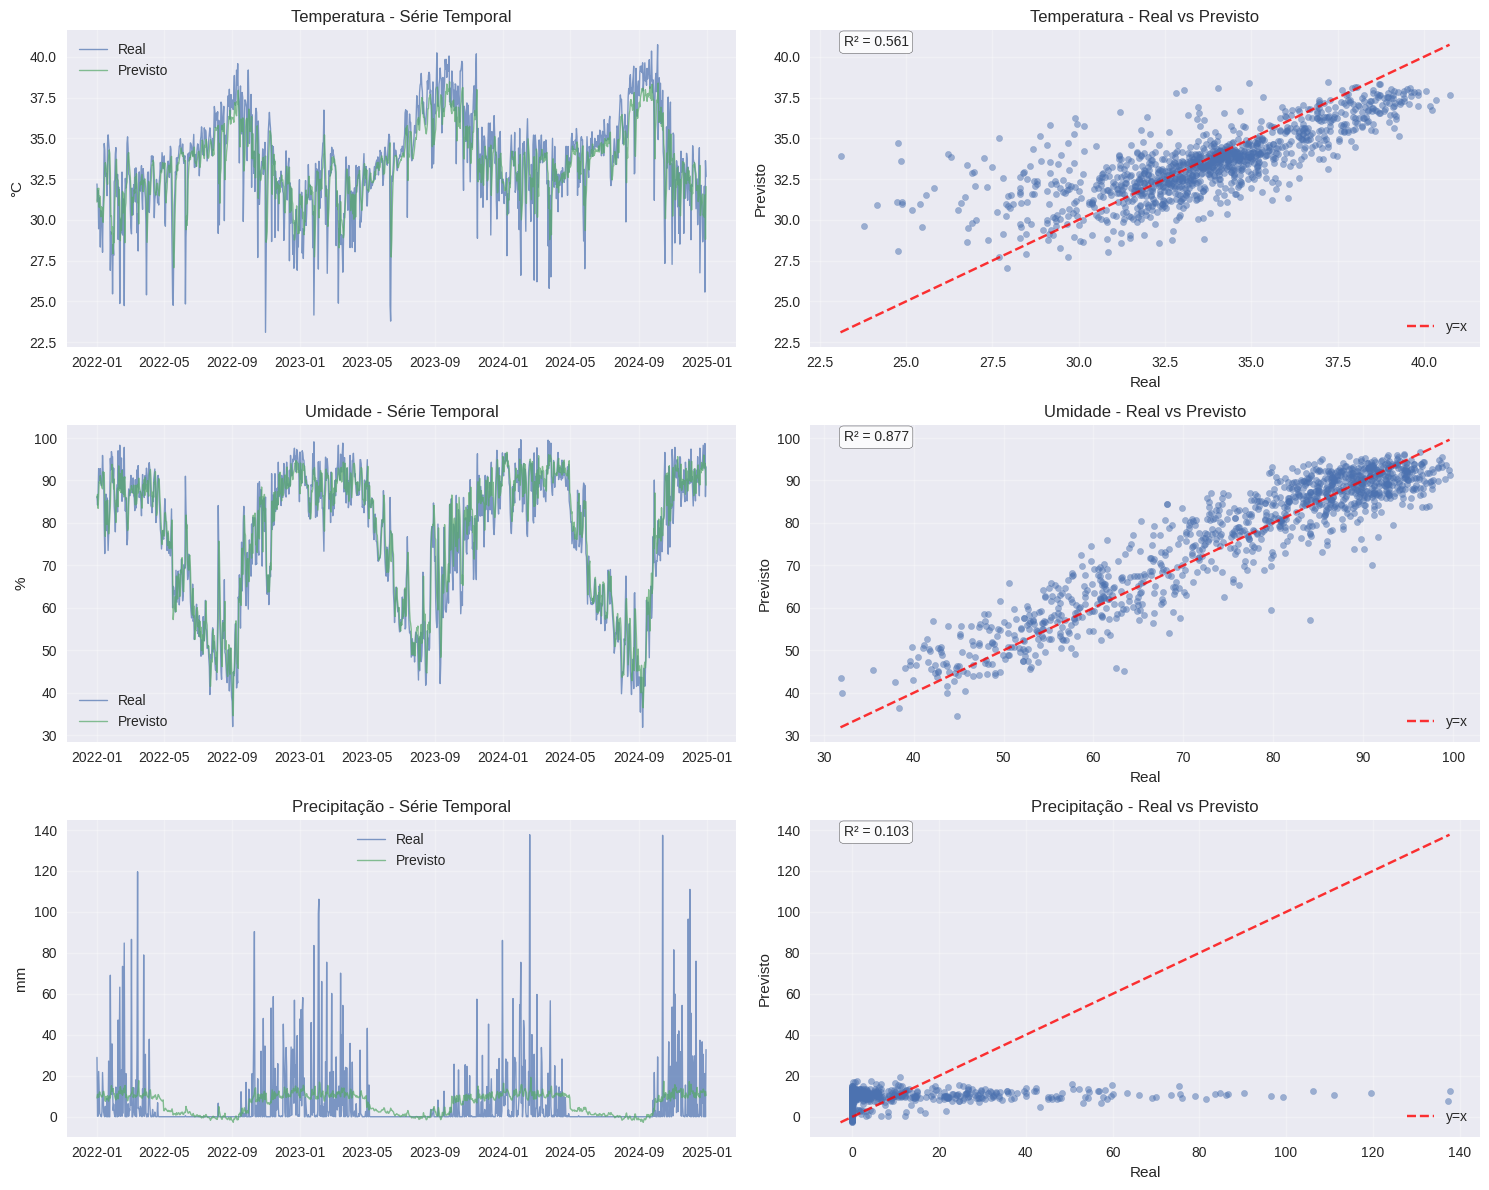

In [72]:
print("\n=== VISUALIZAÇÃO GRÁFICA ===")

import matplotlib.pyplot as plt

# Criar subplots para cada variável
fig, axes = plt.subplots(3, 2, figsize=(15, 12))


target_names = ['Temperatura', 'Umidade', 'Precipitação']
units = ['°C', '%', 'mm']

for i, target_name in enumerate(target_names):
    comp_df = comparison_dfs[target_name]

    # Gráfico 1: Série temporal
    axes[i, 0].plot(comp_df['Data'], comp_df['Real'], label='Real', alpha=0.7, linewidth=1)
    axes[i, 0].plot(comp_df['Data'], comp_df['Previsto'], label='Previsto', alpha=0.7, linewidth=1)
    axes[i, 0].set_title(f'{target_name} - Série Temporal')
    axes[i, 0].set_ylabel(units[i])
    axes[i, 0].legend()
    axes[i, 0].grid(True, alpha=0.3)

    # Gráfico 2: Dispersão Real vs Previsto
    axes[i, 1].scatter(comp_df['Real'], comp_df['Previsto'], alpha=0.5, s=20)

    # Linha de perfeita previsão (y=x)
    min_val = min(comp_df['Real'].min(), comp_df['Previsto'].min())
    max_val = max(comp_df['Real'].max(), comp_df['Previsto'].max())
    axes[i, 1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='y=x')

    axes[i, 1].set_title(f'{target_name} - Real vs Previsto')
    axes[i, 1].set_xlabel('Real')
    axes[i, 1].set_ylabel('Previsto')
    axes[i, 1].legend()
    axes[i, 1].grid(True, alpha=0.3)

    # Adicionar R² no gráfico de dispersão
    r2 = r2_score(comp_df['Real'], comp_df['Previsto'])
    axes[i, 1].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[i, 1].transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

In [73]:
print("\n=== ANÁLISE DETALHADA DOS ERROS ===")

for target_name, comp_df in comparison_dfs.items():
    print(f"\n🔍 {target_name} - Distribuição dos Erros:")

    # Estatísticas de erro
    error_stats = comp_df['Erro'].describe()
    print(f"   Estatísticas do Erro:")
    print(f"      Média (viés): {error_stats['mean']:.4f}")
    print(f"      Std: {error_stats['std']:.4f}")
    print(f"      Min: {error_stats['min']:.4f}")
    print(f"      Max: {error_stats['max']:.4f}")

    # Proporção de erros dentro de intervalos
    if target_name == 'Temperatura':
        intervals = [0.5, 1.0, 2.0, 5.0]
    elif target_name == 'Umidade':
        intervals = [2.0, 5.0, 10.0, 20.0]
    else:  # Precipitação
        intervals = [5.0, 10.0, 20.0, 50.0]

    print(f"   Proporção de erros absolutos:")
    for interval in intervals:
        prop = (comp_df['Erro_Absoluto'] <= interval).mean() * 100
        print(f"      ≤ {interval}: {prop:.1f}%")


=== ANÁLISE DETALHADA DOS ERROS ===

🔍 Temperatura - Distribuição dos Erros:
   Estatísticas do Erro:
      Média (viés): 0.1519
      Std: 1.9561
      Min: -10.8139
      Max: 4.8249
   Proporção de erros absolutos:
      ≤ 0.5: 26.5%
      ≤ 1.0: 47.5%
      ≤ 2.0: 75.7%
      ≤ 5.0: 97.2%

🔍 Umidade - Distribuição dos Erros:
   Estatísticas do Erro:
      Média (viés): -0.7519
      Std: 5.4985
      Min: -16.3434
      Max: 26.9442
   Proporção de erros absolutos:
      ≤ 2.0: 28.6%
      ≤ 5.0: 65.1%
      ≤ 10.0: 93.5%
      ≤ 20.0: 99.7%

🔍 Precipitação - Distribuição dos Erros:
   Estatísticas do Erro:
      Média (viés): -0.0397
      Std: 15.6520
      Min: -16.9174
      Max: 129.7355
   Proporção de erros absolutos:
      ≤ 5.0: 47.3%
      ≤ 10.0: 70.8%
      ≤ 20.0: 92.9%
      ≤ 50.0: 97.8%
